In [1]:
import argparse
import easydict

from utils.config import *
from utils.count_model import *
from agents import *
from torchsummaryX import summary


In [2]:
import random

RandomListOfIntegers = [random.randint(0, 99999) for iter in range(5)]
print(RandomListOfIntegers)

[35950, 95529, 14937, 49265, 39528]


In [3]:
RandomListOfIntegers = [31638, 62999, 95194, 46484, 57516]

# 40 % drop

In [4]:
total_best = []
total_history = []
for i, seed in enumerate(RandomListOfIntegers):
    config = easydict.EasyDict()
    config.exp_name = "vgg16_exp_cifar100_0"
    config.log_dir = os.path.join("experiments", config.exp_name, "logs/")

    config.load_file = os.path.join("experiments", "vgg16_exp_cifar100_0","checkpoints", "checkpoint.pth")
    config.cuda = True
    config.gpu_device = 1
    config.seed = seed
    config.milestones = [10, 20,30,40]
    config.gamma = 0.9
    config.img_size = 32
    config.num_classes = 100
    config.data_mode = "download"
    config.data_loader_workers = 4
    config.pin_memory = True
    config.async_loading = True
    config.batch_size = 128
    config.async_loading = True
    config.max_epoch = 100
    torch.cuda.init()
    
    agent = globals()["VGG_BN_cifar"](config)
    agent.init_graph()
    agent.load_checkpoint(config.load_file)
    agent.compress(method = 'random',k=0.8)
    best,history = agent.train(specializing=False, freeze_conv=False,cosine_decay = False)
    total_best.append(best)
    total_history.append(history)
    summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))

    

Files already downloaded and verified


Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 3.7778024819805798	Top1 Acc: 0.4233599999809265


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.929355056979988	Top1 Acc: 0.5765


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.8857527489552413	Top1 Acc: 0.80528


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 1.677580272095113	Top1 Acc: 0.6701


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 0.8071140939622279	Top1 Acc: 0.8877600000190735


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 1.321127695373342	Top1 Acc: 0.6854


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 0.4712981318726259	Top1 Acc: 0.9128999999809265


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.2659586668014526	Top1 Acc: 0.6899


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 0.3384745324511662	Top1 Acc: 0.9297400000190735


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 1.2723721522319167	Top1 Acc: 0.6927


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 0.2809327888824141	Top1 Acc: 0.93534


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.28541867642463	Top1 Acc: 0.6948


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 0.23515568629783742	Top1 Acc: 0.9448599999809265


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.3007863050774684	Top1 Acc: 0.6932


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 0.20807302720330256	Top1 Acc: 0.9492399999809266


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.3227565869500366	Top1 Acc: 0.6969


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 0.1900483482634015	Top1 Acc: 0.9523799999809265


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.3288381786286076	Top1 Acc: 0.6957


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 0.17014776080694344	Top1 Acc: 0.9561599999809265


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.3646625816067564	Top1 Acc: 0.693


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 0.1567512414301448	Top1 Acc: 0.95944


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.362107519862018	Top1 Acc: 0.6933


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 0.14467683822259575	Top1 Acc: 0.9630400000572205


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.3705365604992155	Top1 Acc: 0.6981


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 0.13532899768875384	Top1 Acc: 0.9649000000572204


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.3856083275396613	Top1 Acc: 0.6972


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 0.12796777954606145	Top1 Acc: 0.96632


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.3845573248742502	Top1 Acc: 0.6984


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.12019743709384328	Top1 Acc: 0.9679200000572205


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.4116059737869455	Top1 Acc: 0.6959


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.1160769326054989	Top1 Acc: 0.9682000000572205


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.4083432977712607	Top1 Acc: 0.6973


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.10914346798682761	Top1 Acc: 0.97132


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.4258523515508146	Top1 Acc: 0.6978


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.1056901379714689	Top1 Acc: 0.9715400000190735


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.4290622827372974	Top1 Acc: 0.6964


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.1023611516579795	Top1 Acc: 0.9721200000572204


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.461452509029002	Top1 Acc: 0.6915


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.10185355667853752	Top1 Acc: 0.9720199999809265


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.4630699512324756	Top1 Acc: 0.6974


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.09187493013108478	Top1 Acc: 0.9755600000190735


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.4680908299699615	Top1 Acc: 0.6954


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.08970088587926171	Top1 Acc: 0.9760400000190735


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.4752438807789283	Top1 Acc: 0.697


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.08851724706323402	Top1 Acc: 0.9754600000381469


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.4721759225748763	Top1 Acc: 0.6967


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.08207233167727433	Top1 Acc: 0.977620000038147


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.470527496518968	Top1 Acc: 0.6957


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.08083876511058234	Top1 Acc: 0.9783999999809265


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.4757315742818615	Top1 Acc: 0.6953


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.07888274844688223	Top1 Acc: 0.9782600000190735


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.4871628465531748	Top1 Acc: 0.6989


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.0740080573012495	Top1 Acc: 0.9806000000190734


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.4871863715256317	Top1 Acc: 0.6991


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.07207326511935809	Top1 Acc: 0.9802000000572204


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.4883640559413764	Top1 Acc: 0.6975


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.07586089804616121	Top1 Acc: 0.9795200000190735


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.48764436984364	Top1 Acc: 0.6966


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.06993902061858674	Top1 Acc: 0.980480000038147


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.500230553783948	Top1 Acc: 0.6989


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.06857625479378816	Top1 Acc: 0.9809000000190735


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.5111807826199108	Top1 Acc: 0.7001


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.06488832112287393	Top1 Acc: 0.982420000038147


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.5099008898191815	Top1 Acc: 0.7


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.06358203744692037	Top1 Acc: 0.9829000000190735


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.5169746679595755	Top1 Acc: 0.7008


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.06192770546964367	Top1 Acc: 0.98324


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.515558720389499	Top1 Acc: 0.7004


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.06048541838574745	Top1 Acc: 0.9839


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.5236959215960926	Top1 Acc: 0.6982


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.06169880996636875	Top1 Acc: 0.9832


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.5319908902614932	Top1 Acc: 0.6985


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.05981098284797214	Top1 Acc: 0.983640000038147


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.5250804220573813	Top1 Acc: 0.7005


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.05805458996297263	Top1 Acc: 0.9842000000190735


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.525738934927349	Top1 Acc: 0.7005


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.056646948096716346	Top1 Acc: 0.9848400000190735


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.518756757808637	Top1 Acc: 0.7008


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.057692080290745136	Top1 Acc: 0.9841800000572205


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.5134757372397412	Top1 Acc: 0.7035


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.05220838734294143	Top1 Acc: 0.9862000000190735


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.5294854784313636	Top1 Acc: 0.6977


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.05215841459820185	Top1 Acc: 0.98562


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.5388508793673938	Top1 Acc: 0.6982


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.05237483600025897	Top1 Acc: 0.9858000000190735


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.5432283123837243	Top1 Acc: 0.6997


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.05015652273279017	Top1 Acc: 0.9866200000572205


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.5356395538849166	Top1 Acc: 0.7038


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.04872920464419419	Top1 Acc: 0.986320000038147


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.535567405103128	Top1 Acc: 0.6994


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.050291416773577326	Top1 Acc: 0.98666


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5456370484979847	Top1 Acc: 0.7011


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.04906673860781447	Top1 Acc: 0.98702


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.5455913936035544	Top1 Acc: 0.7028


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.04993234332317434	Top1 Acc: 0.986420000038147


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.551373674899717	Top1 Acc: 0.7006


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.049851969687168096	Top1 Acc: 0.987100000038147


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.5586824839628195	Top1 Acc: 0.7005


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.04840199782958497	Top1 Acc: 0.98722


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5617912404144867	Top1 Acc: 0.6986


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.04627175369988317	Top1 Acc: 0.9872599999809265


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5670233980009827	Top1 Acc: 0.6953


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.04576502355110958	Top1 Acc: 0.9874000000190735


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5513515578040593	Top1 Acc: 0.7028


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.04556280193383546	Top1 Acc: 0.98804


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5555140874053859	Top1 Acc: 0.698


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.04450632418122362	Top1 Acc: 0.9878000000381469


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5732095226456848	Top1 Acc: 0.7007


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.04541467131375123	Top1 Acc: 0.9872200000190735


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.565876530695565	Top1 Acc: 0.7018


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.044775184279645955	Top1 Acc: 0.98798


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.578565036194234	Top1 Acc: 0.6989


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.04306535268931285	Top1 Acc: 0.988420000038147


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5666320625739762	Top1 Acc: 0.7009


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.04207924815952359	Top1 Acc: 0.9886200000190735


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5605692569213578	Top1 Acc: 0.7005


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.04208331016342506	Top1 Acc: 0.9883400000381469


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5681849348394177	Top1 Acc: 0.6972


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.04129541491198799	Top1 Acc: 0.9891000000190735


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5684428803528412	Top1 Acc: 0.7011


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.040074245022881365	Top1 Acc: 0.988840000038147


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.568809242188176	Top1 Acc: 0.7019


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.041455603875172185	Top1 Acc: 0.9885


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5706673038156727	Top1 Acc: 0.7025


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.039198860099724946	Top1 Acc: 0.989200000038147


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5870286316811284	Top1 Acc: 0.702


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.04046119901034838	Top1 Acc: 0.988640000038147


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.5815260742284074	Top1 Acc: 0.6989


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.04190610167677598	Top1 Acc: 0.9885800000381469


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.5777337762373913	Top1 Acc: 0.7018


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.03934975729807449	Top1 Acc: 0.9896400000190735


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.5759427472005916	Top1 Acc: 0.7016


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.0398104501485615	Top1 Acc: 0.9890800000190735


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5670532146586647	Top1 Acc: 0.7007


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.03845026418018867	Top1 Acc: 0.989660000038147


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.5858921657634686	Top1 Acc: 0.6992


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.039551849983146654	Top1 Acc: 0.9895600000190735


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.5766056874130345	Top1 Acc: 0.7003


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.0370512766265751	Top1 Acc: 0.9899399999809265


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.578625586968434	Top1 Acc: 0.7036


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.03733603302103555	Top1 Acc: 0.9898800000572204


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.5697123883645745	Top1 Acc: 0.7037


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.03564885886662337	Top1 Acc: 0.99038


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.5590540004681936	Top1 Acc: 0.7026


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.03673502244055271	Top1 Acc: 0.99024


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.5835185662100586	Top1 Acc: 0.6971


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.034699295686743674	Top1 Acc: 0.9911200000190735


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.572980220559277	Top1 Acc: 0.7024


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.036244385687591474	Top1 Acc: 0.9899800000190735


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.5775669798066345	Top1 Acc: 0.7007


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.03573746282054716	Top1 Acc: 0.990140000038147


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.5915506368950953	Top1 Acc: 0.7022


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.035021948570962	Top1 Acc: 0.9902600000190734


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.607376044309592	Top1 Acc: 0.6981


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.03446227086522161	Top1 Acc: 0.99102


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.5920667354064653	Top1 Acc: 0.7021


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.03594454065979937	Top1 Acc: 0.99064


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.598701584188244	Top1 Acc: 0.7006


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.035381733157607675	Top1 Acc: 0.9903800000190734


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.6014471506770653	Top1 Acc: 0.7003


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.03580971574529891	Top1 Acc: 0.989960000038147


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.5987117245227476	Top1 Acc: 0.7032


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.03350649473955259	Top1 Acc: 0.99076


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.593925183332419	Top1 Acc: 0.7063


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.034389697330887134	Top1 Acc: 0.990640000038147


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.5955160162116908	Top1 Acc: 0.7024


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.03346668643033718	Top1 Acc: 0.9907400000190735


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.5903282437143447	Top1 Acc: 0.7034


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.03200256193171034	Top1 Acc: 0.9913400000190735


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.585378872442849	Top1 Acc: 0.7022


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.03362900672166053	Top1 Acc: 0.99116


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.582842248150065	Top1 Acc: 0.7026


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.03532682051715415	Top1 Acc: 0.990320000038147


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.5985632946219626	Top1 Acc: 0.7041


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.03335433647565334	Top1 Acc: 0.9912400000381469


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.591178760498385	Top1 Acc: 0.7011


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.03134462793710192	Top1 Acc: 0.9918200000190734


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.5985145961182028	Top1 Acc: 0.7029


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.03239267984705279	Top1 Acc: 0.991380000038147


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.610665586930287	Top1 Acc: 0.6995


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.03257173038375995	Top1 Acc: 0.9911800000572205


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.5967536364929587	Top1 Acc: 0.7053


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.03185239647064939	Top1 Acc: 0.9913400000572204


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.6016836603985558	Top1 Acc: 0.7


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.033521971649840436	Top1 Acc: 0.99096


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.5918362397181838	Top1 Acc: 0.7029


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.03249236704814998	Top1 Acc: 0.9916200000190735


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.5962728277037415	Top1 Acc: 0.7007


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.03098702478839461	Top1 Acc: 0.991620000038147


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.5961944332605675	Top1 Acc: 0.7


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.028889035452347812	Top1 Acc: 0.99272


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.6099451063554497	Top1 Acc: 0.7006


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.03203790623318318	Top1 Acc: 0.99164


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.599905243402795	Top1 Acc: 0.7036


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.029604157370984402	Top1 Acc: 0.99238


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.6053772508343565	Top1 Acc: 0.6976


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.03130653884280902	Top1 Acc: 0.9911999999809266


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.6015218156802504	Top1 Acc: 0.703


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.032815325223957484	Top1 Acc: 0.99112


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 50.45it/s]


Validation results at epoch-99 | loss: 1.6137561322767524	Top1 Acc: 0.7026
                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
1

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 3.7610614446118054	Top1 Acc: 0.43274000005722046


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.9198698333547086	Top1 Acc: 0.5737


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.851793851998761	Top1 Acc: 0.8105199999809265


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 1.654575678366649	Top1 Acc: 0.6679


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 0.797452141409335	Top1 Acc: 0.8863400000572205


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 1.3256388849849943	Top1 Acc: 0.6856


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 0.4660599631116823	Top1 Acc: 0.9134199999809265


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.2643487943878657	Top1 Acc: 0.6937


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 0.3463442082447774	Top1 Acc: 0.9267600000572205


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 1.268125217172164	Top1 Acc: 0.6926


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 0.2783576722263985	Top1 Acc: 0.9365199999809265


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.2815085483502737	Top1 Acc: 0.6916


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 0.23496529071227365	Top1 Acc: 0.94558


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.2947300581992427	Top1 Acc: 0.6942


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 0.20819286439958437	Top1 Acc: 0.9497200000572205


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.322561961186083	Top1 Acc: 0.6929


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 0.1863254864731103	Top1 Acc: 0.95332


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.3310823915879937	Top1 Acc: 0.6977


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 0.16885457880547283	Top1 Acc: 0.9568999999809266


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.3551612104041666	Top1 Acc: 0.6982


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 0.15393194962111886	Top1 Acc: 0.960940000038147


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.3660370466075367	Top1 Acc: 0.6969


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 0.14230261916470954	Top1 Acc: 0.9632200000190735


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.3743154067027419	Top1 Acc: 0.6979


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 0.13325293562220186	Top1 Acc: 0.9653600000572204


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.389472156385832	Top1 Acc: 0.6974


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 0.12421901307790481	Top1 Acc: 0.9680200000381469


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.3996961033796962	Top1 Acc: 0.6989


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.12176722236682692	Top1 Acc: 0.9681199999809265


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.4036024160022977	Top1 Acc: 0.7004


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.11423941920785342	Top1 Acc: 0.96946


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.4166629299332825	Top1 Acc: 0.6984


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.10926298751398121	Top1 Acc: 0.971100000038147


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.4242084562023984	Top1 Acc: 0.6993


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.1037190342012345	Top1 Acc: 0.97266


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.4408208531669424	Top1 Acc: 0.6963


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.10191130371826232	Top1 Acc: 0.9726000000190735


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.447816464719893	Top1 Acc: 0.6997


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.09888772544501077	Top1 Acc: 0.9731200000190735


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.4437933247300643	Top1 Acc: 0.7002


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.0923951685647754	Top1 Acc: 0.9747999999809265


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.4544345366803906	Top1 Acc: 0.6964


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.09089778902490273	Top1 Acc: 0.9759200000381469


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.4639549293095553	Top1 Acc: 0.6999


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.08757664204177344	Top1 Acc: 0.9763200000190735


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.4601075815249094	Top1 Acc: 0.7015


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.08458486707199869	Top1 Acc: 0.97694


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.478685831721825	Top1 Acc: 0.6974


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.07978454546626572	Top1 Acc: 0.978420000038147


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.486559043202219	Top1 Acc: 0.6967


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.08280938554107381	Top1 Acc: 0.9771800000572205


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.5014900625506533	Top1 Acc: 0.7


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.07911566446256607	Top1 Acc: 0.978300000038147


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.485643684109555	Top1 Acc: 0.6993


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.07643648374187367	Top1 Acc: 0.9789600000572205


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.4920380281496652	Top1 Acc: 0.698


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.0725398092242458	Top1 Acc: 0.97962


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.4976444591449787	Top1 Acc: 0.7021


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.07045672481398449	Top1 Acc: 0.980660000038147


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.5131020198894451	Top1 Acc: 0.6994


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.06694000282460619	Top1 Acc: 0.9816400000572204


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.5027140899549556	Top1 Acc: 0.7029


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.06763712581856858	Top1 Acc: 0.981880000038147


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.4995729349836517	Top1 Acc: 0.7024


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.06353219891028941	Top1 Acc: 0.98264


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.5096395830564862	Top1 Acc: 0.7026


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.06184110660915789	Top1 Acc: 0.983740000038147


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.51824730031098	Top1 Acc: 0.7014


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.06372167639520086	Top1 Acc: 0.9828600000190735


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.5179480812217616	Top1 Acc: 0.7027


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.06173191824808831	Top1 Acc: 0.98314


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.5284538797185392	Top1 Acc: 0.7017


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.05986628426558069	Top1 Acc: 0.9839600000190735


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.5247242843048483	Top1 Acc: 0.7021


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.059053936184805526	Top1 Acc: 0.9840000000190735


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.5235527270956883	Top1 Acc: 0.7028


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.05716574207291274	Top1 Acc: 0.98408


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.5454506451570535	Top1 Acc: 0.6997


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.054428219329565763	Top1 Acc: 0.985080000038147


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.5460733311085761	Top1 Acc: 0.6989


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.05796182055092986	Top1 Acc: 0.9842600000572205


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.564564196369316	Top1 Acc: 0.6988


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.05314953434412056	Top1 Acc: 0.9857400000190735


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.5439549518536917	Top1 Acc: 0.702


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.051745848856447146	Top1 Acc: 0.985760000038147


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.5486926247801962	Top1 Acc: 0.7026


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.050817189006911366	Top1 Acc: 0.986060000038147


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.5615743730641618	Top1 Acc: 0.701


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.04972268781288887	Top1 Acc: 0.9862200000572204


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.5617674528797971	Top1 Acc: 0.7017


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.049303537003619745	Top1 Acc: 0.987100000038147


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.549966586541526	Top1 Acc: 0.6991


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.051442953117210845	Top1 Acc: 0.98594


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.551733694499052	Top1 Acc: 0.7015


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.0461106131167706	Top1 Acc: 0.9876400000190735


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5623074060753932	Top1 Acc: 0.7007


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.04606257299737781	Top1 Acc: 0.9872400000572205


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.5636851659303979	Top1 Acc: 0.7014


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.04825622901615813	Top1 Acc: 0.9872400000381469


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5557214172580573	Top1 Acc: 0.7047


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.04662093340331103	Top1 Acc: 0.98706


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.576510812662825	Top1 Acc: 0.699


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.04694704086903263	Top1 Acc: 0.9871


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5623776158200036	Top1 Acc: 0.7029


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.0446969772322232	Top1 Acc: 0.98792


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5653289737580698	Top1 Acc: 0.7033


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.045245583103660045	Top1 Acc: 0.9875600000381469


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5607026226912872	Top1 Acc: 0.7034


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.04368917188366585	Top1 Acc: 0.9878


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5612605689447137	Top1 Acc: 0.7037


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.04549275387121398	Top1 Acc: 0.987320000038147


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5744923111758655	Top1 Acc: 0.6986


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.045202286737730434	Top1 Acc: 0.98812


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5774880692928652	Top1 Acc: 0.6966


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.043977449272933136	Top1 Acc: 0.9872000000190735


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5848042059548293	Top1 Acc: 0.6967


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.04219743108038631	Top1 Acc: 0.9883000000190735


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5734880559052093	Top1 Acc: 0.7016


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.042665321539487225	Top1 Acc: 0.98866


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5671534930603415	Top1 Acc: 0.7024


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.041805089351332855	Top1 Acc: 0.9880800000190735


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.576117390318762	Top1 Acc: 0.7008


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.04059010911661455	Top1 Acc: 0.9888000000190735


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5773104172718675	Top1 Acc: 0.6993


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.03952479824099852	Top1 Acc: 0.9892200000190735


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5669569410855257	Top1 Acc: 0.7034


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.039157067575608676	Top1 Acc: 0.989160000038147


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.5711865923072719	Top1 Acc: 0.7069


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.04040769969239412	Top1 Acc: 0.9891000000190735


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.5755682097205632	Top1 Acc: 0.6998


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.03771693312236682	Top1 Acc: 0.98992


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.5787855990325348	Top1 Acc: 0.702


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.03722311865509776	Top1 Acc: 0.9902


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5662724353090118	Top1 Acc: 0.7067


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.03702285569137358	Top1 Acc: 0.9900600000190735


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.598658475694777	Top1 Acc: 0.6975


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.03804178589888279	Top1 Acc: 0.9895000000190735


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.5971955347664748	Top1 Acc: 0.7004


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.03575381871236636	Top1 Acc: 0.99058


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.59238258041913	Top1 Acc: 0.7024


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.036882257715458305	Top1 Acc: 0.9903600000572205


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.6110191450843327	Top1 Acc: 0.7002


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.03908057985327128	Top1 Acc: 0.98882


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.5999019130875793	Top1 Acc: 0.7028


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.036001056015891646	Top1 Acc: 0.990080000038147


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.6121291661564308	Top1 Acc: 0.699


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.03918371519283451	Top1 Acc: 0.989520000038147


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.5986291803891146	Top1 Acc: 0.7014


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.03605178619146614	Top1 Acc: 0.9896800000190735


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.5978431611121455	Top1 Acc: 0.7039


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.03486831275784337	Top1 Acc: 0.99104


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.592414997800996	Top1 Acc: 0.7006


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.034566507399644314	Top1 Acc: 0.99098


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.5957914138142066	Top1 Acc: 0.7012


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.03589552203479135	Top1 Acc: 0.99028


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.5928708843038053	Top1 Acc: 0.6991


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.03224069802948009	Top1 Acc: 0.99148


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.6046368200567704	Top1 Acc: 0.7034


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.03396757845969304	Top1 Acc: 0.9906


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.5958116190342964	Top1 Acc: 0.7021


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.0342698653771654	Top1 Acc: 0.9907200000190735


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.6001612204539626	Top1 Acc: 0.7022


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.03239411156257743	Top1 Acc: 0.9916800000190735


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.5941124445275416	Top1 Acc: 0.7042


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.03367644050122832	Top1 Acc: 0.9907400000190735


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.6192245528667788	Top1 Acc: 0.6971


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.034169192129955686	Top1 Acc: 0.9908200000190734


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.6027086445047884	Top1 Acc: 0.7016


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.033888779566301715	Top1 Acc: 0.9907600000190735


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.5963021079196205	Top1 Acc: 0.7


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.03389759239671595	Top1 Acc: 0.9905000000190735


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.5940005281303502	Top1 Acc: 0.7024


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.03105136158023401	Top1 Acc: 0.99208


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.5991858560827714	Top1 Acc: 0.7017


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.032252473636385046	Top1 Acc: 0.99144


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.6071509137938293	Top1 Acc: 0.6992


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.03382878754492801	Top1 Acc: 0.9908000000190735


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.6157943930806993	Top1 Acc: 0.6974


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.033061658520527816	Top1 Acc: 0.99128


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.6005229210551781	Top1 Acc: 0.7001


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.032205400273889837	Top1 Acc: 0.991200000038147


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.6073013936417013	Top1 Acc: 0.7013


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.03130387669414891	Top1 Acc: 0.991280000038147


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.5833494029467619	Top1 Acc: 0.7043


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.030500614501135732	Top1 Acc: 0.9919


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.6060159779802154	Top1 Acc: 0.7006


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.03012311860652226	Top1 Acc: 0.9922


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.588765704179112	Top1 Acc: 0.7036


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.031841398981373635	Top1 Acc: 0.99166


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.5933574890788598	Top1 Acc: 0.7017


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.029325001583675212	Top1 Acc: 0.9919200000190734


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.5922407183466079	Top1 Acc: 0.7048


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.031205649379297824	Top1 Acc: 0.9915


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.6072633417346809	Top1 Acc: 0.7053


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.028650303140801886	Top1 Acc: 0.9926800000190735


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.6074691693994063	Top1 Acc: 0.7034


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.03036817851836038	Top1 Acc: 0.99212


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.6090534155881857	Top1 Acc: 0.7052


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.03141542919613707	Top1 Acc: 0.99168


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 47.76it/s]


Validation results at epoch-99 | loss: 1.5978300412998925	Top1 Acc: 0.705
                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
10

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 3.759246832269537	Top1 Acc: 0.4455600000190735


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.917141793649408	Top1 Acc: 0.5837


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.841687276540205	Top1 Acc: 0.8146800000572204


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 1.6493266911446294	Top1 Acc: 0.669


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 0.7842232508732535	Top1 Acc: 0.8904800000572205


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 1.3215772011612035	Top1 Acc: 0.6865


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 0.46349693678529064	Top1 Acc: 0.9137400000572204


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.2689299213735363	Top1 Acc: 0.6912


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 0.33862931355643455	Top1 Acc: 0.9293199999809265


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 1.2658923969993108	Top1 Acc: 0.6957


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 0.2765415136695213	Top1 Acc: 0.9380000000190735


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.2822637007206301	Top1 Acc: 0.6938


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 0.23849729989724391	Top1 Acc: 0.9441


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.3020732968668394	Top1 Acc: 0.6965


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 0.20682701498956022	Top1 Acc: 0.9501200000190735


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.3220882408226593	Top1 Acc: 0.6959


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 0.18510230310508968	Top1 Acc: 0.9533399999809266


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.3576826649376108	Top1 Acc: 0.6964


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 0.1696326718534655	Top1 Acc: 0.9566399999809265


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.3531970774071127	Top1 Acc: 0.6974


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 0.15842600593633968	Top1 Acc: 0.9589000000190735


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.3761955250667621	Top1 Acc: 0.6979


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 0.1414047687521676	Top1 Acc: 0.963340000038147


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.385116519052771	Top1 Acc: 0.6962


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 0.13380248081463073	Top1 Acc: 0.9654600000190735


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.389333525790444	Top1 Acc: 0.6939


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 0.12743935195724373	Top1 Acc: 0.9664000000572205


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.411250101614602	Top1 Acc: 0.6961


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.1192785213937235	Top1 Acc: 0.96832


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.4247448482090914	Top1 Acc: 0.6987


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.11403368147628387	Top1 Acc: 0.9699800000190735


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.414640014684653	Top1 Acc: 0.7013


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.10764644412166627	Top1 Acc: 0.9712200000190735


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.4286558726165868	Top1 Acc: 0.6996


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.10413327620214666	Top1 Acc: 0.97166


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.4332378657558296	Top1 Acc: 0.7022


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.10160304206754546	Top1 Acc: 0.9724800000190735


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.4390208524993704	Top1 Acc: 0.7034


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.09759623066657949	Top1 Acc: 0.9735400000572204


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.4596212868449054	Top1 Acc: 0.7026


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.0932434720780386	Top1 Acc: 0.974180000038147


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.4736179852787452	Top1 Acc: 0.7022


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.08894766041118166	Top1 Acc: 0.9761600000190734


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.458921652051467	Top1 Acc: 0.7032


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.08659520093589793	Top1 Acc: 0.9773800000572205


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.4693477915812143	Top1 Acc: 0.7019


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.0840992370853796	Top1 Acc: 0.977520000038147


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.4832069843630247	Top1 Acc: 0.7006


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.08315550106699052	Top1 Acc: 0.97764


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.47338100475601	Top1 Acc: 0.7028


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.07823645959958396	Top1 Acc: 0.9791600000190734


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.4804588601559023	Top1 Acc: 0.7019


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.07794110302139273	Top1 Acc: 0.9793799999809265


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.4857037655914886	Top1 Acc: 0.7024


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.07326134348102391	Top1 Acc: 0.9797600000190735


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.4903267425826834	Top1 Acc: 0.7044


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.07474390530715817	Top1 Acc: 0.9794800000572205


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.4895099046864086	Top1 Acc: 0.6998


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.07265795373102969	Top1 Acc: 0.9802400000190735


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.4996603410455245	Top1 Acc: 0.702


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.06916051626900958	Top1 Acc: 0.9810200000190735


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.486501931389676	Top1 Acc: 0.7057


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.06614699929743015	Top1 Acc: 0.982420000038147


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.5030466054059282	Top1 Acc: 0.7024


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.07039935949742032	Top1 Acc: 0.981040000038147


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.4909718843955029	Top1 Acc: 0.7014


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.0649869616555474	Top1 Acc: 0.9823000000190735


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.5061075332798535	Top1 Acc: 0.7015


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.06562280919774414	Top1 Acc: 0.982220000038147


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.5118114397495608	Top1 Acc: 0.6993


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.06128122460316209	Top1 Acc: 0.9833800000572205


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.5213956591449207	Top1 Acc: 0.7008


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.05764370515485249	Top1 Acc: 0.9843600000190735


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.5216306983670103	Top1 Acc: 0.7017


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.058208200475558296	Top1 Acc: 0.9844600000572205


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.5227017410193817	Top1 Acc: 0.7003


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.05602320220531024	Top1 Acc: 0.9847000000190735


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.530600446688978	Top1 Acc: 0.6991


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.05559970340107941	Top1 Acc: 0.9850800000190735


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.542108849634098	Top1 Acc: 0.7024


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.05206228783139792	Top1 Acc: 0.98562


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.519206170039841	Top1 Acc: 0.7033


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.054106627009770904	Top1 Acc: 0.9856000000572205


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.5526330078704447	Top1 Acc: 0.7011


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.04916441210014436	Top1 Acc: 0.9870400000190734


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.547189007077036	Top1 Acc: 0.7031


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.052228337377690906	Top1 Acc: 0.9856800000381469


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.5384451460234727	Top1 Acc: 0.7028


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.051288083688739466	Top1 Acc: 0.9867400000190735


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.538280357288409	Top1 Acc: 0.7032


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.04894220280935011	Top1 Acc: 0.9869400000572205


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5373812732817251	Top1 Acc: 0.7038


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.04956611621019709	Top1 Acc: 0.9869000000190735


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.5445186925839773	Top1 Acc: 0.7006


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.04673460307900253	Top1 Acc: 0.9876000000190734


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5369166060339046	Top1 Acc: 0.7009


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.04762123779053121	Top1 Acc: 0.987540000038147


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.5616915339156041	Top1 Acc: 0.7016


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.04889518578115212	Top1 Acc: 0.9864600000190735


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5562532446052455	Top1 Acc: 0.6997


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.045019297905818885	Top1 Acc: 0.9875800000381469


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5436107214493087	Top1 Acc: 0.7032


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.0455891218041177	Top1 Acc: 0.98762


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5609080414228802	Top1 Acc: 0.6997


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.04624226059326354	Top1 Acc: 0.9877


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5476184110098248	Top1 Acc: 0.7016


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.04406209316704889	Top1 Acc: 0.9881000000190735


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5576312956930716	Top1 Acc: 0.7015


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.04380144372396647	Top1 Acc: 0.9882400000190735


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5733929781974116	Top1 Acc: 0.7047


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.04198972047413783	Top1 Acc: 0.98876


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.566338447075856	Top1 Acc: 0.7038


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.04506715985081728	Top1 Acc: 0.9876800000381469


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5522569749928727	Top1 Acc: 0.7043


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.041378640302973786	Top1 Acc: 0.9893400000381469


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5604549088055575	Top1 Acc: 0.7048


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.04233514069986846	Top1 Acc: 0.9889600000190735


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5670705324486842	Top1 Acc: 0.7048


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.04208396346358311	Top1 Acc: 0.98886


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5664199303977098	Top1 Acc: 0.7026


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.040407495668439	Top1 Acc: 0.9892000000190735


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.574752250804177	Top1 Acc: 0.7007


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.044122658351965036	Top1 Acc: 0.9884200000190735


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5730637583551528	Top1 Acc: 0.7041


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.04246848103616511	Top1 Acc: 0.9883799999809265


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5668899039678936	Top1 Acc: 0.7044


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.03842083896484102	Top1 Acc: 0.98972


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.5696396578716327	Top1 Acc: 0.7041


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.03977904514745449	Top1 Acc: 0.9891400000190735


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.5719256038907208	Top1 Acc: 0.7023


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.0391949026504784	Top1 Acc: 0.9899000000190735


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.5752146515665175	Top1 Acc: 0.7049


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.04071561221385856	Top1 Acc: 0.98922


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5657385829128796	Top1 Acc: 0.7016


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.03807007251521739	Top1 Acc: 0.9896600000190735


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.5809406072278567	Top1 Acc: 0.7015


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.03667527188778	Top1 Acc: 0.9902800000190735


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.5934313943114462	Top1 Acc: 0.7012


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.036879771667749375	Top1 Acc: 0.9896


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.5892872795273987	Top1 Acc: 0.6997


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.036529492735719815	Top1 Acc: 0.99032


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.5752654724483248	Top1 Acc: 0.7003


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.037453027554046926	Top1 Acc: 0.9893800000190734


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.582336798498902	Top1 Acc: 0.7025


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.03632485576431312	Top1 Acc: 0.9901


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.5849062581605549	Top1 Acc: 0.7001


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.03918834365999607	Top1 Acc: 0.98888


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.5873181736921962	Top1 Acc: 0.7023


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.03721340458668635	Top1 Acc: 0.9894600000381469


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.5832375046573108	Top1 Acc: 0.7019


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.037446092572444314	Top1 Acc: 0.9896800000190735


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.5920410216609133	Top1 Acc: 0.7013


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.033832698456628625	Top1 Acc: 0.99126


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.5837121432340597	Top1 Acc: 0.7054


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.03328059707908793	Top1 Acc: 0.991260000038147


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.5918037302886383	Top1 Acc: 0.7044


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.03649646309478318	Top1 Acc: 0.9899200000190734


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.6016002848178525	Top1 Acc: 0.7017


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.03620646517280766	Top1 Acc: 0.9903600000572205


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.5989407195320613	Top1 Acc: 0.7011


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.033639466392395595	Top1 Acc: 0.99086


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.5916394402709189	Top1 Acc: 0.7013


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.03295268423383689	Top1 Acc: 0.9913200000190735


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.5962238206139094	Top1 Acc: 0.7019


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.03507973602079713	Top1 Acc: 0.9904800000190734


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.5944420899016947	Top1 Acc: 0.7027


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.033362773632930824	Top1 Acc: 0.9907800000190735


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.6007992512063136	Top1 Acc: 0.7042


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.036290889779758424	Top1 Acc: 0.98982


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.5999002275587637	Top1 Acc: 0.7032


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.03070057566275301	Top1 Acc: 0.99192


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.6187053466144996	Top1 Acc: 0.6982


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.035476941178264595	Top1 Acc: 0.9904200000190735


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.6072626566585106	Top1 Acc: 0.701


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.034435777591489004	Top1 Acc: 0.9906400000190735


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.608482323115385	Top1 Acc: 0.7029


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.033489067665994396	Top1 Acc: 0.9907399999809265


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.6062871519523332	Top1 Acc: 0.7029


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.03439229370578361	Top1 Acc: 0.9904


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.5945272943641566	Top1 Acc: 0.7035


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.03256454981763459	Top1 Acc: 0.9907


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.6005601279343231	Top1 Acc: 0.7044


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.030665876965522004	Top1 Acc: 0.9921200000190735


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.5889273866822449	Top1 Acc: 0.7046


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.031975357100138886	Top1 Acc: 0.9912000000190735


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.590791300882267	Top1 Acc: 0.7039


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.03236718671729841	Top1 Acc: 0.99116


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.602641159975076	Top1 Acc: 0.7016


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.030353734236391608	Top1 Acc: 0.9919


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.5947506518303594	Top1 Acc: 0.7032


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.03009257449642243	Top1 Acc: 0.99156


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.609827713875831	Top1 Acc: 0.7004


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.030957016528195814	Top1 Acc: 0.9917200000190735


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.6154184824303737	Top1 Acc: 0.7019


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.032109967463880854	Top1 Acc: 0.9912400000190735


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.621871838086768	Top1 Acc: 0.7009


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.03115723397025405	Top1 Acc: 0.99158


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.5989926646027384	Top1 Acc: 0.7041


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.030844158585876455	Top1 Acc: 0.9911400000190735


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 49.46it/s]


Validation results at epoch-99 | loss: 1.603536913666544	Top1 Acc: 0.7045
                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
10

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 3.744499312642285	Top1 Acc: 0.4342


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.917894206469572	Top1 Acc: 0.5858


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.8565941942317405	Top1 Acc: 0.8119599999809265


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 1.662561033345476	Top1 Acc: 0.6667


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 0.7979773577216946	Top1 Acc: 0.8867


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 1.3223593318009679	Top1 Acc: 0.6815


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 0.46466115806871056	Top1 Acc: 0.9143000000572205


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.2670454299902614	Top1 Acc: 0.6881


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 0.3430298274511571	Top1 Acc: 0.9282200000190735


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 1.2693034584009195	Top1 Acc: 0.6927


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 0.27413285971450074	Top1 Acc: 0.9375200000572205


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.2892599505714224	Top1 Acc: 0.6931


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 0.2351439209164256	Top1 Acc: 0.944140000038147


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.303839956657796	Top1 Acc: 0.6934


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 0.20765773690951145	Top1 Acc: 0.9489199999809265


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.3226639341704454	Top1 Acc: 0.6965


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 0.18510097873104198	Top1 Acc: 0.9549400000572205


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.331922345523593	Top1 Acc: 0.6962


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 0.17099644847766823	Top1 Acc: 0.9554000000572205


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.356810705571235	Top1 Acc: 0.6975


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 0.1552836996743746	Top1 Acc: 0.95986


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.3639960123013846	Top1 Acc: 0.7003


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 0.14297385811996277	Top1 Acc: 0.9640200000190735


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.3737502384789382	Top1 Acc: 0.6975


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 0.13128309102390734	Top1 Acc: 0.965960000038147


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.3901003651981112	Top1 Acc: 0.6964


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 0.12986517805234551	Top1 Acc: 0.9659199999809265


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.4007357653183272	Top1 Acc: 0.6989


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.11885202420718224	Top1 Acc: 0.9682600000572205


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.4079799380483506	Top1 Acc: 0.6972


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.11957816539041678	Top1 Acc: 0.9669


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.4179439454139033	Top1 Acc: 0.697


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.11395279241397101	Top1 Acc: 0.9696800000572204


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.426871168462536	Top1 Acc: 0.6964


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.10167185532981934	Top1 Acc: 0.973320000038147


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.446050472651856	Top1 Acc: 0.6973


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.1019136259079818	Top1 Acc: 0.9725400000190735


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.4627724561510207	Top1 Acc: 0.695


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.10038546095971408	Top1 Acc: 0.9726800000190735


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.466748202148872	Top1 Acc: 0.6964


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.093362226810716	Top1 Acc: 0.97442


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.4576436190665523	Top1 Acc: 0.6966


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.08747009757687063	Top1 Acc: 0.9770400000572205


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.473641107353983	Top1 Acc: 0.6969


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.08711956954463516	Top1 Acc: 0.9763200000190735


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.473033784311029	Top1 Acc: 0.6948


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.08155954259035685	Top1 Acc: 0.9772199999809266


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.483504441720021	Top1 Acc: 0.6948


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.0829672605285178	Top1 Acc: 0.97714


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.488429052920281	Top1 Acc: 0.6969


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.07861557453775497	Top1 Acc: 0.978300000038147


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.4810304000407835	Top1 Acc: 0.7009


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.07717377170348716	Top1 Acc: 0.9782199999809266


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.4907536574556857	Top1 Acc: 0.6986


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.07591762552109292	Top1 Acc: 0.9793600000381469


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.4929042375540431	Top1 Acc: 0.6984


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.07399686870148496	Top1 Acc: 0.979440000038147


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.5063563645640505	Top1 Acc: 0.6996


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.07075487794664205	Top1 Acc: 0.9808000000381469


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.5049757504764991	Top1 Acc: 0.6977


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.06820560761434419	Top1 Acc: 0.9817200000190734


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.4926616292965562	Top1 Acc: 0.7015


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.0661078250211904	Top1 Acc: 0.9827600000572204


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.4956918215449853	Top1 Acc: 0.7022


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.06113947752882224	Top1 Acc: 0.983760000038147


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.511594300028644	Top1 Acc: 0.7022


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.06431280014097995	Top1 Acc: 0.982200000038147


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.5284350869021839	Top1 Acc: 0.6987


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.06536425918321628	Top1 Acc: 0.9819000000381469


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.5170110267928885	Top1 Acc: 0.6998


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.05982924187484452	Top1 Acc: 0.9842


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.5119450228123725	Top1 Acc: 0.7006


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.058333378582907	Top1 Acc: 0.9842000000572204


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.519044409824323	Top1 Acc: 0.6982


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.05504549782284919	Top1 Acc: 0.985400000038147


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.522679861587814	Top1 Acc: 0.703


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.060615810336988145	Top1 Acc: 0.9833599999809265


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.5139174053940592	Top1 Acc: 0.7039


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.0581166597578646	Top1 Acc: 0.98344


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.5186559429651574	Top1 Acc: 0.704


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.053765112608004255	Top1 Acc: 0.985420000038147


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.51169998887219	Top1 Acc: 0.7049


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.054328448089111185	Top1 Acc: 0.9843200000190735


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.5144870522656018	Top1 Acc: 0.7034


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.051606145999430086	Top1 Acc: 0.985820000038147


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.5413454197630096	Top1 Acc: 0.7015


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.05299159546580423	Top1 Acc: 0.9858000000572205


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.5411098003387451	Top1 Acc: 0.7008


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.050738953020604674	Top1 Acc: 0.9863600000190735


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.5312840123719806	Top1 Acc: 0.7018


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.04970541369417668	Top1 Acc: 0.9866200000190735


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5326854171632212	Top1 Acc: 0.7013


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.04735309056475606	Top1 Acc: 0.9873599999809265


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.5510745984089525	Top1 Acc: 0.7021


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.04864672403615873	Top1 Acc: 0.98692


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5487505710577663	Top1 Acc: 0.7012


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.04937190035491458	Top1 Acc: 0.9867


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.5400242684762688	Top1 Acc: 0.7033


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.048682647703639455	Top1 Acc: 0.9866600000572204


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.546374213846424	Top1 Acc: 0.7008


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.047953227394358124	Top1 Acc: 0.9869400000572205


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5530144579802887	Top1 Acc: 0.6981


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.04522021659447447	Top1 Acc: 0.98772


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5435359115842022	Top1 Acc: 0.7044


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.04426465148839842	Top1 Acc: 0.987640000038147


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5531849755516536	Top1 Acc: 0.7021


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.04358466804418189	Top1 Acc: 0.988500000038147


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5630339700964433	Top1 Acc: 0.7033


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.04336586106292275	Top1 Acc: 0.9881200000190735


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.567814991443972	Top1 Acc: 0.7021


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.04049780731306166	Top1 Acc: 0.9893000000190735


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.560309210910073	Top1 Acc: 0.7039


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.04225156425148287	Top1 Acc: 0.98856


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.560134942018533	Top1 Acc: 0.7039


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.043360235543488085	Top1 Acc: 0.9883000000190735


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.560892974274068	Top1 Acc: 0.7017


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.041714594895949066	Top1 Acc: 0.9890800000190735


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5643229016774818	Top1 Acc: 0.7001


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.04505474985007892	Top1 Acc: 0.9878000000381469


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5621106202089334	Top1 Acc: 0.7056


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.03847637654298826	Top1 Acc: 0.9901800000190735


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.5721524169173422	Top1 Acc: 0.7045


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.04161763199083412	Top1 Acc: 0.98848


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5716725323773637	Top1 Acc: 0.7011


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.04182118605917601	Top1 Acc: 0.9883000000572204


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.570369844195209	Top1 Acc: 0.6982


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.04101604523132448	Top1 Acc: 0.9885800000190735


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.5643062455744683	Top1 Acc: 0.7059


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.0384634443334854	Top1 Acc: 0.989480000038147


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.5726579910592189	Top1 Acc: 0.7014


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.03827577084064712	Top1 Acc: 0.9893200000190735


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.5724480800990817	Top1 Acc: 0.7024


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.036636114417029846	Top1 Acc: 0.9903000000190735


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5680637857581996	Top1 Acc: 0.7039


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.038019501468371554	Top1 Acc: 0.9895


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.563263657726819	Top1 Acc: 0.7054


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.04044143191140974	Top1 Acc: 0.9889000000381469


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.557341850256618	Top1 Acc: 0.7053


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.036933675246394196	Top1 Acc: 0.9898800000190735


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.563842224169381	Top1 Acc: 0.7015


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.03711507500499449	Top1 Acc: 0.98972


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.5626214652121821	Top1 Acc: 0.7032


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.038836099268139704	Top1 Acc: 0.9893600000190735


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.5787159008315848	Top1 Acc: 0.7051


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.03880459319233247	Top1 Acc: 0.9891200000190735


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.5739432844934584	Top1 Acc: 0.703


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.03810997540250306	Top1 Acc: 0.9891400000190735


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.588869748236258	Top1 Acc: 0.7027


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.0341560648685164	Top1 Acc: 0.9909600000190735


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.584644005268435	Top1 Acc: 0.7038


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.03782465622481673	Top1 Acc: 0.9898800000190735


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.576664145988754	Top1 Acc: 0.7042


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.035715413939617476	Top1 Acc: 0.9903400000190735


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.5881286180472072	Top1 Acc: 0.7024


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.03782450089759915	Top1 Acc: 0.9899000000572205


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.5877819483793234	Top1 Acc: 0.7007


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.03595454160414655	Top1 Acc: 0.9902


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.5770264305645907	Top1 Acc: 0.7007


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.03527615001172666	Top1 Acc: 0.990880000038147


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.5735037025017073	Top1 Acc: 0.7038


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.03284720978592439	Top1 Acc: 0.9912400000572205


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.5821530977381935	Top1 Acc: 0.7057


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.033660205120406565	Top1 Acc: 0.99132


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.593335029445117	Top1 Acc: 0.7014


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.03492851966701429	Top1 Acc: 0.9904200000190735


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.5888359788097912	Top1 Acc: 0.7052


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.03384282781154184	Top1 Acc: 0.9907800000190735


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.5825029626677307	Top1 Acc: 0.7022


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.0345395915424618	Top1 Acc: 0.9909600000190735


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.5698818360702902	Top1 Acc: 0.7082


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.03491083788030478	Top1 Acc: 0.9907800000381469


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.5901157373114476	Top1 Acc: 0.7072


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.03221367460692211	Top1 Acc: 0.9915


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.5944133483910863	Top1 Acc: 0.7043


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.035092130578492226	Top1 Acc: 0.99022


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.5956986478612394	Top1 Acc: 0.7014


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.03198462314999012	Top1 Acc: 0.99144


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.5921207651307312	Top1 Acc: 0.702


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.03353682086895913	Top1 Acc: 0.9911000000190735


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.5759122598020336	Top1 Acc: 0.7054


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.03126961761571067	Top1 Acc: 0.991700000038147


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.5939272717584538	Top1 Acc: 0.7029


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.03183210961987524	Top1 Acc: 0.991760000038147


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.5929665761657907	Top1 Acc: 0.702


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.03194118102731378	Top1 Acc: 0.991520000038147


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.5823928464817096	Top1 Acc: 0.7049


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.031126700229752245	Top1 Acc: 0.9918000000190735


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.5961904737013806	Top1 Acc: 0.704


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.029554274798992572	Top1 Acc: 0.99166


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.5861159623423708	Top1 Acc: 0.706


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.03047851672457993	Top1 Acc: 0.991860000038147


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.5864886181263984	Top1 Acc: 0.7068


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.031413332890252325	Top1 Acc: 0.991600000038147


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.5999271892294098	Top1 Acc: 0.6993


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.032833177638013876	Top1 Acc: 0.9912800000190735


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.579638374002674	Top1 Acc: 0.7038


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.031179266308894015	Top1 Acc: 0.99154


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.6036813772177394	Top1 Acc: 0.7045


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.0317115014409432	Top1 Acc: 0.99156


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 59.57it/s]


Validation results at epoch-99 | loss: 1.6009129436710212	Top1 Acc: 0.7051
                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
1

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 3.7834043393049703	Top1 Acc: 0.4388800000190735


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 2.9357122710988492	Top1 Acc: 0.5812


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 1.8664337268570805	Top1 Acc: 0.81082


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 1.6749575334259226	Top1 Acc: 0.665


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 0.7945394219492402	Top1 Acc: 0.8882599999809265


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 1.3226901028729692	Top1 Acc: 0.6841


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 0.46904682282291715	Top1 Acc: 0.9133800000190735


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.2735093054892141	Top1 Acc: 0.6907


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 0.3401883063871232	Top1 Acc: 0.9285399999809265


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 1.2711404810977887	Top1 Acc: 0.6913


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 0.2820492728286997	Top1 Acc: 0.9360600000190735


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.2774225458314148	Top1 Acc: 0.6942


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 0.2350860026943714	Top1 Acc: 0.94438


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.3084202808669851	Top1 Acc: 0.6913


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 0.2084409364539644	Top1 Acc: 0.9502000000190735


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.3190990263902689	Top1 Acc: 0.6946


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 0.18206479034536635	Top1 Acc: 0.9547


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.337476614155347	Top1 Acc: 0.6926


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 0.16870799588272944	Top1 Acc: 0.9570199999809265


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.356906641133224	Top1 Acc: 0.695


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 0.15381359713880913	Top1 Acc: 0.960500000038147


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.3735920749133146	Top1 Acc: 0.696


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 0.13976842427002195	Top1 Acc: 0.9634999999809265


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.3768740537800366	Top1 Acc: 0.6968


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 0.1311454225398238	Top1 Acc: 0.966380000038147


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.3907925645007362	Top1 Acc: 0.6951


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 0.1287888463138772	Top1 Acc: 0.9661799999809265


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.401685958421683	Top1 Acc: 0.6972


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.11869787169463189	Top1 Acc: 0.969080000038147


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.407147596908521	Top1 Acc: 0.6974


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.11359859837214355	Top1 Acc: 0.9697


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.414173882973345	Top1 Acc: 0.6987


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.10898127505922561	Top1 Acc: 0.97118


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.4357756195189078	Top1 Acc: 0.6973


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.10583788029792364	Top1 Acc: 0.97188


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.4317747724207142	Top1 Acc: 0.6986


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.10283168833083509	Top1 Acc: 0.9723200000572204


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.4588638227197188	Top1 Acc: 0.6946


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.09801466299501983	Top1 Acc: 0.9735000000572205


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.4498699488519113	Top1 Acc: 0.6995


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.08990058035630247	Top1 Acc: 0.9753800000190734


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.4582415924796575	Top1 Acc: 0.6987


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.09132960276759189	Top1 Acc: 0.975080000038147


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.4638457705702963	Top1 Acc: 0.7003


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.08955496232813734	Top1 Acc: 0.974880000038147


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.4710883596275426	Top1 Acc: 0.6987


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.0827740376667522	Top1 Acc: 0.9774600000190735


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.4730613193934476	Top1 Acc: 0.6977


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.08138638653832933	Top1 Acc: 0.977480000038147


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.4778744118123115	Top1 Acc: 0.6974


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.07565583314632288	Top1 Acc: 0.9789400000190734


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.4882887979097004	Top1 Acc: 0.7


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.08104638489977935	Top1 Acc: 0.9772200000572204


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.4923896140690092	Top1 Acc: 0.6999


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.0753831589484916	Top1 Acc: 0.979560000038147


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.5086012399649318	Top1 Acc: 0.7005


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.07435500247837484	Top1 Acc: 0.97954


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.4961395746544948	Top1 Acc: 0.6982


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.07223098590979567	Top1 Acc: 0.980840000038147


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.5194347583794896	Top1 Acc: 0.6981


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.06679805270050798	Top1 Acc: 0.98192


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.5064081557189362	Top1 Acc: 0.7015


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.06663535978130596	Top1 Acc: 0.982180000038147


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.5039471750017963	Top1 Acc: 0.7015


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.06484741305746615	Top1 Acc: 0.9824400000190735


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.5137121617039548	Top1 Acc: 0.7017


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.06616129384845343	Top1 Acc: 0.982000000038147


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.5136283349387254	Top1 Acc: 0.7014


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.06268346663373892	Top1 Acc: 0.9826000000572205


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.5095264753208886	Top1 Acc: 0.7018


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.0601109815642352	Top1 Acc: 0.9831400000381469


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.510606643519824	Top1 Acc: 0.7001


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.060156678180674765	Top1 Acc: 0.9834200000190735


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.5336977960188178	Top1 Acc: 0.6992


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.06006664075100285	Top1 Acc: 0.98296


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.5255781065059613	Top1 Acc: 0.7017


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.057283343806805664	Top1 Acc: 0.9843800000190734


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.5312498000603687	Top1 Acc: 0.7006


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.05743899669907892	Top1 Acc: 0.9839599999809265


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.5349686907816538	Top1 Acc: 0.702


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.05324428786268777	Top1 Acc: 0.9860800000572204


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.5276485304289227	Top1 Acc: 0.7022


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.05400700124499895	Top1 Acc: 0.98538


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.5389306545257568	Top1 Acc: 0.7025


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.050192655280918416	Top1 Acc: 0.9861600000190734


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.5400469039059892	Top1 Acc: 0.6993


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.05096980723340417	Top1 Acc: 0.9864000000572205


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.5379181919218619	Top1 Acc: 0.7005


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.050267419946925414	Top1 Acc: 0.98668


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.529053205930734	Top1 Acc: 0.7034


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.047305805084612365	Top1 Acc: 0.987080000038147


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5455322801312315	Top1 Acc: 0.7016


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.04844913215321653	Top1 Acc: 0.987400000038147


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.5451534903502162	Top1 Acc: 0.703


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.04982463747401105	Top1 Acc: 0.98596


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5389344488518149	Top1 Acc: 0.7039


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.0496080351417022	Top1 Acc: 0.98644


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.5438080580928657	Top1 Acc: 0.7013


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.04601919705815175	Top1 Acc: 0.9876600000190735


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5425117875956282	Top1 Acc: 0.7009


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.04929556818488423	Top1 Acc: 0.9864


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.548416919346097	Top1 Acc: 0.7002


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.04449695206182959	Top1 Acc: 0.9883800000190734


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5377031436449364	Top1 Acc: 0.701


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.0449097766624311	Top1 Acc: 0.987260000038147


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5430324568024165	Top1 Acc: 0.7011


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.044554049687464826	Top1 Acc: 0.98788


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.544263196142414	Top1 Acc: 0.7016


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.041052272184835294	Top1 Acc: 0.9884800000190734


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.540585601631599	Top1 Acc: 0.7025


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.04259195852229167	Top1 Acc: 0.98876


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5371570722966255	Top1 Acc: 0.7029


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.04527698588007323	Top1 Acc: 0.9876800000190735


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.54985167708578	Top1 Acc: 0.7016


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.043593738149479984	Top1 Acc: 0.9882


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5573235274870185	Top1 Acc: 0.7043


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.04087671924315755	Top1 Acc: 0.98896


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.55013368703142	Top1 Acc: 0.7046


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.04262186465737269	Top1 Acc: 0.9883400000190735


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5498607641533961	Top1 Acc: 0.7019


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.03904761535965878	Top1 Acc: 0.98966


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.547921126401877	Top1 Acc: 0.7043


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.04036087298151249	Top1 Acc: 0.98926


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5579192645942108	Top1 Acc: 0.7045


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.04016854220410557	Top1 Acc: 0.989100000038147


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.562088361269311	Top1 Acc: 0.7007


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.03923947191523278	Top1 Acc: 0.9893200000190735


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.561803962610945	Top1 Acc: 0.7017


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.038450651192356404	Top1 Acc: 0.989500000038147


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.5658231121075303	Top1 Acc: 0.7008


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.04028339694609003	Top1 Acc: 0.9889000000572205


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.5643970558914957	Top1 Acc: 0.7011


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.038062923997545337	Top1 Acc: 0.98972


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5561719951750357	Top1 Acc: 0.7037


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.039046201196349106	Top1 Acc: 0.9897400000572204


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.5647212100934378	Top1 Acc: 0.7046


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.03831773628468823	Top1 Acc: 0.9898


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.5661743569977675	Top1 Acc: 0.7036


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.03852950530055234	Top1 Acc: 0.9891000000572204


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.5594241204141062	Top1 Acc: 0.7061


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.03759230028413941	Top1 Acc: 0.9897


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.5530868768692017	Top1 Acc: 0.7051


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.037632233987245564	Top1 Acc: 0.98992


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.5745306875132308	Top1 Acc: 0.7029


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.0369368853664402	Top1 Acc: 0.98964


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.5868039395235762	Top1 Acc: 0.705


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.039426735989377855	Top1 Acc: 0.98932


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.5748333085941364	Top1 Acc: 0.701


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.036896739369425016	Top1 Acc: 0.9898400000572205


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.5727472109130667	Top1 Acc: 0.7029


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.03417384223607571	Top1 Acc: 0.990820000038147


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.585077546819856	Top1 Acc: 0.7007


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.03759844341527318	Top1 Acc: 0.98934


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.5785979266408123	Top1 Acc: 0.7009


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.036675337261384555	Top1 Acc: 0.9901


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.5888542615914647	Top1 Acc: 0.7007


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.03575021832409646	Top1 Acc: 0.9898600000572204


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.580216208590737	Top1 Acc: 0.7018


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.03707962041920827	Top1 Acc: 0.9897800000190735


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.5742732075196277	Top1 Acc: 0.7048


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.035804931220867676	Top1 Acc: 0.990100000038147


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.5640982223462454	Top1 Acc: 0.7039


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.034264378124595526	Top1 Acc: 0.990720000038147


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.5684063804300525	Top1 Acc: 0.7039


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.03337554393760155	Top1 Acc: 0.99108


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.574300151837023	Top1 Acc: 0.706


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.03371831615958029	Top1 Acc: 0.990400000038147


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.5990028064462203	Top1 Acc: 0.7035


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.03354979479861686	Top1 Acc: 0.991060000038147


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.5879780657683746	Top1 Acc: 0.7036


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.032709205510032834	Top1 Acc: 0.9906800000190735


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.6020180665993993	Top1 Acc: 0.7025


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.0362147603415029	Top1 Acc: 0.9903400000190735


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.5876830046689963	Top1 Acc: 0.703


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.032783532673564486	Top1 Acc: 0.9911600000190735


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.5809092974360985	Top1 Acc: 0.7012


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.0328624815670559	Top1 Acc: 0.99136


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.592453744592546	Top1 Acc: 0.7023


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.030939087107339325	Top1 Acc: 0.9918400000190735


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.5790918559967717	Top1 Acc: 0.7062


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.03067146491526109	Top1 Acc: 0.9918800000190735


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.5945495472678655	Top1 Acc: 0.7044


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.03220479171294385	Top1 Acc: 0.9907000000190734


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.5844263245787802	Top1 Acc: 0.7063


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.03147722269787127	Top1 Acc: 0.9917600000190735


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.5991304992120476	Top1 Acc: 0.7039


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.032065672826145766	Top1 Acc: 0.9917000000190734


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.5922631312020217	Top1 Acc: 0.7031


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.03176776651778947	Top1 Acc: 0.9918


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.5973188152796105	Top1 Acc: 0.703


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.032674179075385834	Top1 Acc: 0.9909


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.5985574269596534	Top1 Acc: 0.7015


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.030267681092824166	Top1 Acc: 0.992160000038147


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.599099619479119	Top1 Acc: 0.7047


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.03036881198801691	Top1 Acc: 0.992040000038147


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.5901766804200184	Top1 Acc: 0.7047


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.027554194612042678	Top1 Acc: 0.9927800000381469


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.5969227499599699	Top1 Acc: 0.7022


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.0305788243758728	Top1 Acc: 0.9918800000190735


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 49.50it/s]

Validation results at epoch-99 | loss: 1.6004761246186268	Top1 Acc: 0.7035
                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
1

In [5]:
summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))

                                Kernel Shape      Output Shape     Params  \
Layer                                                                       
0_features.Conv2d_0            [3, 51, 3, 3]   [1, 51, 32, 32]     1.428k   
1_features.BatchNorm2d_1                [51]   [1, 51, 32, 32]      102.0   
2_features.ReLU_2                          -   [1, 51, 32, 32]          -   
3_features.Conv2d_3           [51, 51, 3, 3]   [1, 51, 32, 32]     23.46k   
4_features.BatchNorm2d_4                [51]   [1, 51, 32, 32]      102.0   
5_features.ReLU_5                          -   [1, 51, 32, 32]          -   
6_features.MaxPool2d_6                     -   [1, 51, 16, 16]          -   
7_features.Conv2d_7          [51, 102, 3, 3]  [1, 102, 16, 16]     46.92k   
8_features.BatchNorm2d_8               [102]  [1, 102, 16, 16]      204.0   
9_features.ReLU_9                          -  [1, 102, 16, 16]          -   
10_features.Conv2d_10       [102, 102, 3, 3]  [1, 102, 16, 16]    93.738k   

,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_features.Conv2d_0,"[3, 51, 3, 3]","[1, 51, 32, 32]",1428.0,1410048.0
1_features.BatchNorm2d_1,[51],"[1, 51, 32, 32]",102.0,51.0
2_features.ReLU_2,-,"[1, 51, 32, 32]",NaN,NaN
3_features.Conv2d_3,"[51, 51, 3, 3]","[1, 51, 32, 32]",23460.0,23970816.0
4_features.BatchNorm2d_4,[51],"[1, 51, 32, 32]",102.0,51.0
5_features.ReLU_5,-,"[1, 51, 32, 32]",NaN,NaN
6_features.MaxPool2d_6,-,"[1, 51, 16, 16]",NaN,NaN
7_features.Conv2d_7,"[51, 102, 3, 3]","[1, 102, 16, 16]",46920.0,11985408.0
8_features.BatchNorm2d_8,[102],"[1, 102, 16, 16]",204.0,102.0


In [6]:
print(sum(total_best)/5)
print()
for i in np.array(total_history).sum(0)/5:
    print(i)

0.7066800000000001

0.5801799999999999
0.66774
0.68462
0.69072
0.693
0.6935
0.69372
0.69536
0.69572
0.6962200000000001
0.6968799999999999
0.6973
0.696
0.6979
0.6979200000000001
0.6985400000000002
0.69808
0.69816
0.6968399999999999
0.6992200000000001
0.69786
0.69946
0.69872
0.6972400000000001
0.6978199999999999
0.70034
0.6998599999999999
0.6997599999999999
0.69926
0.6992200000000001
0.7023400000000001
0.7017
0.70174
0.70068
0.70036
0.70034
0.7003400000000001
0.7016600000000001
0.70082
0.7021599999999999
0.70138
0.70144
0.70124
0.70178
0.7019
0.70138
0.7020000000000001
0.70146
0.7016199999999999
0.7009399999999999
0.6991600000000001
0.70216
0.70122
0.7021
0.7029599999999999
0.70162
0.70146
0.7016
0.7016600000000001
0.70272
0.70244
0.7022999999999999
0.7017399999999999
0.7034999999999998
0.70122
0.7023999999999999
0.70332
0.70164
0.7021599999999999
0.7026600000000001
0.7025
0.7031799999999999
0.70084
0.70196
0.7026399999999999
0.7018
0.7016
0.7013999999999999
0.7016399999999999
0.70241999

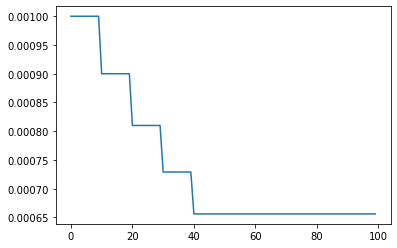

In [7]:
import matplotlib.pyplot as plt
plt.plot(agent.lr_list)

# 60 % drop

In [8]:
total_best = []
total_history = []
for i, seed in enumerate(RandomListOfIntegers):
    config = easydict.EasyDict()
    config.exp_name = "vgg16_exp_cifar100_0"
    config.log_dir = os.path.join("experiments", config.exp_name, "logs/")

    config.load_file = os.path.join("experiments", "vgg16_exp_cifar100_0","checkpoints", "checkpoint.pth")
    config.cuda = True
    config.gpu_device = 1
    config.seed = seed
    config.milestones = [10, 20,30,40]
    config.gamma = 0.9
    config.img_size = 32
    config.num_classes = 100
    config.data_mode = "download"
    config.data_loader_workers = 4
    config.pin_memory = True
    config.async_loading = True
    config.batch_size = 128
    config.async_loading = True
    config.max_epoch = 100
    torch.cuda.init()
    
    agent = globals()["VGG_BN_cifar"](config)
    agent.init_graph()
    agent.load_checkpoint(config.load_file)
    agent.compress(method = 'random',k=0.65)
    best,history = agent.train(specializing=False, freeze_conv=False,cosine_decay = False)
    total_best.append(best)
    total_history.append(history)
    summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))

    

Files already downloaded and verified


Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 4.223574302995297	Top1 Acc: 0.13492000001430512


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 3.6674015190027935	Top1 Acc: 0.2663


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 3.1080003546936736	Top1 Acc: 0.4004400000095367


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.5562297120878967	Top1 Acc: 0.4835


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 2.0036834118616245	Top1 Acc: 0.6187400000572204


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 1.8071427073659776	Top1 Acc: 0.5933


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.2776960186336352	Top1 Acc: 0.7269199999809265


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.486950942232639	Top1 Acc: 0.6276


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 0.9248347171127339	Top1 Acc: 0.78022


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 1.387629907342452	Top1 Acc: 0.6462


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 0.74517006215537	Top1 Acc: 0.8109


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.3818216037146653	Top1 Acc: 0.648


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 0.6340626113859894	Top1 Acc: 0.832680000038147


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.3548690654054474	Top1 Acc: 0.6619


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 0.5595527871337997	Top1 Acc: 0.847840000038147


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.3454214726822287	Top1 Acc: 0.6649


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 0.5081526138593474	Top1 Acc: 0.8612400000381469


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.3579302384883543	Top1 Acc: 0.6683


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 0.4630427567092964	Top1 Acc: 0.8705400000190735


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.381638250018977	Top1 Acc: 0.6655


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 0.4160649299697803	Top1 Acc: 0.8831800000190735


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.3589487890653973	Top1 Acc: 0.6724


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 0.38312026111366193	Top1 Acc: 0.891720000038147


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.3944539510751073	Top1 Acc: 0.6663


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 0.36308274591517875	Top1 Acc: 0.896000000038147


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.393903275833854	Top1 Acc: 0.6731


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 0.33310576070986136	Top1 Acc: 0.9046400000572205


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.3822683344913433	Top1 Acc: 0.6765


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.3196326499552373	Top1 Acc: 0.9079800000572205


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.4340409432785421	Top1 Acc: 0.6674


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.30610565620157726	Top1 Acc: 0.9118000000572205


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.4237857528879672	Top1 Acc: 0.6763


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.29092364710615115	Top1 Acc: 0.91714


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.4434687125531933	Top1 Acc: 0.673


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.27686809346346597	Top1 Acc: 0.9189000000190735


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.4222462675239467	Top1 Acc: 0.6729


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.2675113098700638	Top1 Acc: 0.9226800000190735


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.4336213182799424	Top1 Acc: 0.6754


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.2573253760100021	Top1 Acc: 0.9251


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.4753943395011033	Top1 Acc: 0.6667


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.23724484542751556	Top1 Acc: 0.9308799999809265


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.455541820465764	Top1 Acc: 0.6774


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.22803746844115463	Top1 Acc: 0.9344000000381469


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.487134506430807	Top1 Acc: 0.6772


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.21689012191255988	Top1 Acc: 0.9369200000190735


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.4801725798015353	Top1 Acc: 0.6758


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.2175531789774785	Top1 Acc: 0.9369399999809265


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.4808370116390759	Top1 Acc: 0.6756


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.20425683022726832	Top1 Acc: 0.9403200000572205


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.4847160215619244	Top1 Acc: 0.6781


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.19785600007914217	Top1 Acc: 0.94174


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.4958108301404156	Top1 Acc: 0.6751


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.1887710990712923	Top1 Acc: 0.9441400000572204


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.4984315799761423	Top1 Acc: 0.678


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.18746135878326642	Top1 Acc: 0.9457600000190735


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.4900977973696552	Top1 Acc: 0.6783


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.1777298103665452	Top1 Acc: 0.9483600000190735


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.5135125434851344	Top1 Acc: 0.6747


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.1760557906325821	Top1 Acc: 0.9483600000572204


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.5129458330854584	Top1 Acc: 0.6792


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.16714026806566418	Top1 Acc: 0.9521000000190735


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.5110873044291628	Top1 Acc: 0.6762


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.15837425502288677	Top1 Acc: 0.9531200000572204


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.520080653172505	Top1 Acc: 0.6808


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.15511270569604071	Top1 Acc: 0.95488


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.5016024052342283	Top1 Acc: 0.68


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.14651852066788223	Top1 Acc: 0.9572800000572205


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.520880631253689	Top1 Acc: 0.6807


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.1502122035264359	Top1 Acc: 0.9561600000381469


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.5343858577028107	Top1 Acc: 0.6796


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.14674216920457533	Top1 Acc: 0.9573199999809265


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.5486046294622784	Top1 Acc: 0.6752


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.14296555691553503	Top1 Acc: 0.9580400000572205


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.551854769640331	Top1 Acc: 0.6749


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.13734764480949058	Top1 Acc: 0.9596000000572205


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.5492538772051847	Top1 Acc: 0.6795


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.13204986303854171	Top1 Acc: 0.9608799999809265


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.5481569404843487	Top1 Acc: 0.6817


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.13279596797150114	Top1 Acc: 0.9623600000572204


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.5386387147480929	Top1 Acc: 0.6763


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.12816467529634382	Top1 Acc: 0.9634799999809265


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.5554172924802274	Top1 Acc: 0.6772


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.12071322448685042	Top1 Acc: 0.9640399999809265


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.554789151571974	Top1 Acc: 0.681


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.12113937439725679	Top1 Acc: 0.9645599999809266


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.5632587324214886	Top1 Acc: 0.6812


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.11581018362241938	Top1 Acc: 0.9665799999809265


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.562803164313111	Top1 Acc: 0.6808


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.11627675013145065	Top1 Acc: 0.9665199999809265


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.5925238026848323	Top1 Acc: 0.6765


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.11475009037672407	Top1 Acc: 0.9666800000190735


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5793051704575745	Top1 Acc: 0.6808


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.11000255027028454	Top1 Acc: 0.9675200000572205


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.585016884381258	Top1 Acc: 0.6796


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.11181669547925215	Top1 Acc: 0.96594


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5861918896059446	Top1 Acc: 0.6812


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.10857911817634197	Top1 Acc: 0.9683400000572204


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.5998029844670356	Top1 Acc: 0.6799


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.1079485080183467	Top1 Acc: 0.968960000038147


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.594197215158728	Top1 Acc: 0.6842


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.10666887199177462	Top1 Acc: 0.9681800000190735


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5963888228694094	Top1 Acc: 0.6803


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.10396231517024204	Top1 Acc: 0.9690400000572205


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5920796650874465	Top1 Acc: 0.6822


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.10253682431033657	Top1 Acc: 0.9690200000190735


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.6054547512078587	Top1 Acc: 0.6782


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.10007808249815346	Top1 Acc: 0.9704600000190735


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.6203491023824186	Top1 Acc: 0.6828


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.10495623989064065	Top1 Acc: 0.9696200000190734


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5956118997139266	Top1 Acc: 0.681


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.0950887314117778	Top1 Acc: 0.9719000000572204


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.6118003733550446	Top1 Acc: 0.6811


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.09502202232399255	Top1 Acc: 0.972200000038147


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.6208650809300096	Top1 Acc: 0.6781


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.09262065217375298	Top1 Acc: 0.9733600000190735


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.6017812882797628	Top1 Acc: 0.679


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.09680661232308353	Top1 Acc: 0.9718600000572205


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5893328287933446	Top1 Acc: 0.6817


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.09056332668341945	Top1 Acc: 0.9727999999809265


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.6146347386927544	Top1 Acc: 0.6802


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.09233809033375415	Top1 Acc: 0.9735600000572204


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.6139178909832919	Top1 Acc: 0.6827


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.08949999621762034	Top1 Acc: 0.9733599999809265


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.6328040716014331	Top1 Acc: 0.6825


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.0885533532246833	Top1 Acc: 0.9738799999809266


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.637509887731528	Top1 Acc: 0.6792


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.08820623321854093	Top1 Acc: 0.9743600000381469


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.6395992432968527	Top1 Acc: 0.6785


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.08630508369268358	Top1 Acc: 0.9756400000190735


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.6150954916507383	Top1 Acc: 0.6809


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.08676790555610377	Top1 Acc: 0.9747799999809265


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.5936603093449073	Top1 Acc: 0.6853


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.08862717813142883	Top1 Acc: 0.9738000000572204


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.6174981699714177	Top1 Acc: 0.6868


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.08210442189956108	Top1 Acc: 0.976320000038147


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.6283863511266587	Top1 Acc: 0.6827


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.08422892615008537	Top1 Acc: 0.9752600000190735


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.6121550866320162	Top1 Acc: 0.6837


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.08200721439602963	Top1 Acc: 0.9762999999809265


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.6324717093117629	Top1 Acc: 0.6804


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.08208823329804803	Top1 Acc: 0.976280000038147


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.6360820803461196	Top1 Acc: 0.6804


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.0799646161858688	Top1 Acc: 0.976000000038147


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.6112134245377552	Top1 Acc: 0.6838


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.08035618032488372	Top1 Acc: 0.9768800000190735


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.619936163666882	Top1 Acc: 0.6797


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.07427491192870281	Top1 Acc: 0.9782999999809265


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.6064615008197254	Top1 Acc: 0.6849


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.07923379124325636	Top1 Acc: 0.9773400000190735


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.610479802270479	Top1 Acc: 0.6828


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.07764601514524663	Top1 Acc: 0.978280000038147


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.6280255144155478	Top1 Acc: 0.6821


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.07535488801815397	Top1 Acc: 0.9782799999809265


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.6418379183056988	Top1 Acc: 0.6815


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.07359326395499127	Top1 Acc: 0.9789000000381469


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.669181751299508	Top1 Acc: 0.6757


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.0775940936901952	Top1 Acc: 0.977280000038147


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.6345614134510862	Top1 Acc: 0.6847


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.07412172603847274	Top1 Acc: 0.978160000038147


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.6399394967887975	Top1 Acc: 0.6836


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.071222505534587	Top1 Acc: 0.98


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.6288715623602081	Top1 Acc: 0.6839


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.06983986951153526	Top1 Acc: 0.9802


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.6291547923148433	Top1 Acc: 0.6862


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.06897847541152974	Top1 Acc: 0.9796400000572204


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.6347429752349854	Top1 Acc: 0.6827


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.0695441151704744	Top1 Acc: 0.97926


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.6516104921509949	Top1 Acc: 0.6795


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.06845525468763945	Top1 Acc: 0.980040000038147


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.6618302049516123	Top1 Acc: 0.6835


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.07010998170765693	Top1 Acc: 0.9793400000381469


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.6407458721836912	Top1 Acc: 0.6869


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.07049645191472967	Top1 Acc: 0.9796000000190734


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.6499551142318338	Top1 Acc: 0.6846


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.069330652978014	Top1 Acc: 0.9792999999809265


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.6458712642705893	Top1 Acc: 0.6864


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.06902525298144964	Top1 Acc: 0.97956


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.6427514832231063	Top1 Acc: 0.6857


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.06704988430166031	Top1 Acc: 0.9811400000190735


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.6498760558381866	Top1 Acc: 0.684


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.06642523450095711	Top1 Acc: 0.9805400000190735


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.640225787706013	Top1 Acc: 0.6867


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.06561084172171552	Top1 Acc: 0.9804400000190735


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.6560290191746965	Top1 Acc: 0.6837


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.06733924110212823	Top1 Acc: 0.9803000000190735


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.6482232854336123	Top1 Acc: 0.6836


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.06971780121650385	Top1 Acc: 0.9790399999809265


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.6573440409913849	Top1 Acc: 0.6831


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.06487510006284089	Top1 Acc: 0.9817400000572205


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.6213814518119716	Top1 Acc: 0.6856


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.06744688606875784	Top1 Acc: 0.980220000038147


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.6322377806977382	Top1 Acc: 0.6854


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.06742625042338811	Top1 Acc: 0.9798000000190735


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.6403593277629418	Top1 Acc: 0.6869


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.060753706063779875	Top1 Acc: 0.9819


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.656539971315408	Top1 Acc: 0.6811


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.06557338395158348	Top1 Acc: 0.9812399999809265


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.6502379918400245	Top1 Acc: 0.6828


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.06487385175712503	Top1 Acc: 0.98052


Valiation at -99-: 100%|██████████| 79/79 [00:00<00:00, 99.79it/s]


Validation results at epoch-99 | loss: 1.6464627935916563	Top1 Acc: 0.6791
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 41, 3, 3]  [1, 41, 32, 32]     1.148k   
1_features.BatchNorm2d_1                [41]  [1, 41, 32, 32]       82.0   
2_features.ReLU_2                          -  [1, 41, 32, 32]          -   
3_features.Conv2d_3           [41, 41, 3, 3]  [1, 41, 32, 32]     15.17k   
4_features.BatchNorm2d_4                [41]  [1, 41, 32, 32]       82.0   
5_features.ReLU_5                          -  [1, 41, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 41, 16, 16]          -   
7_features.Conv2d_7           [41, 83, 3, 3]  [1, 83, 16, 16]     30.71k   
8_features.BatchNorm2d_8                [83]  [1, 83, 16, 16]      166.0   
9_features.ReLU_9                          -  [1, 83, 16, 16]          -   
10_features.C

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 4.212316493549006	Top1 Acc: 0.1511


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 3.609529163264021	Top1 Acc: 0.2918


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 3.0378513116665813	Top1 Acc: 0.4133200000190735


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.5022656193262414	Top1 Acc: 0.4792


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.9562452705315008	Top1 Acc: 0.61926


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 1.7812698656999613	Top1 Acc: 0.5904


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.2500085626416804	Top1 Acc: 0.7284799999809265


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.4785113711900348	Top1 Acc: 0.6291


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 0.9225411878522399	Top1 Acc: 0.77834


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 1.3926590862153452	Top1 Acc: 0.645


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 0.742490132827588	Top1 Acc: 0.81014


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.3631575507453726	Top1 Acc: 0.6567


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 0.6296291660774699	Top1 Acc: 0.83422


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.3641019471084015	Top1 Acc: 0.6559


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 0.562770674143301	Top1 Acc: 0.8479000000572204


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.3594227765179887	Top1 Acc: 0.6587


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 0.4976492738327407	Top1 Acc: 0.86296


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.355690144285371	Top1 Acc: 0.6664


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 0.4579597973000363	Top1 Acc: 0.87356


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.3710129940057103	Top1 Acc: 0.6703


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 0.4162964868118696	Top1 Acc: 0.8809600000190735


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.386724595027634	Top1 Acc: 0.6667


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 0.38167504013499337	Top1 Acc: 0.89184


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.385765621933756	Top1 Acc: 0.6708


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 0.3570735741911642	Top1 Acc: 0.8978600000190735


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.4028064133245735	Top1 Acc: 0.6691


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 0.33850082463544345	Top1 Acc: 0.902880000038147


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.4119289977641045	Top1 Acc: 0.675


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.3249050476743132	Top1 Acc: 0.90624


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.4061397042455552	Top1 Acc: 0.6726


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.3057487901976651	Top1 Acc: 0.91108


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.4270496858826167	Top1 Acc: 0.6708


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.2927237052060759	Top1 Acc: 0.915100000038147


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.4323140978813171	Top1 Acc: 0.6712


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.27928725207019645	Top1 Acc: 0.91938


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.4544798211206365	Top1 Acc: 0.6703


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.26579038169987673	Top1 Acc: 0.9234


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.4664803034142604	Top1 Acc: 0.6694


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.2559791074117736	Top1 Acc: 0.9251999999809265


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.461375585085229	Top1 Acc: 0.6729


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.23886841857601004	Top1 Acc: 0.9308


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.4524561928797373	Top1 Acc: 0.6797


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.2316217933736189	Top1 Acc: 0.932240000038147


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.4681325856643388	Top1 Acc: 0.6744


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.2177007482065569	Top1 Acc: 0.93588


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.4600118972078155	Top1 Acc: 0.6793


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.21419422566662055	Top1 Acc: 0.93696


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.4909226320966888	Top1 Acc: 0.6787


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.20299781874165207	Top1 Acc: 0.9391600000190735


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.5141925117637538	Top1 Acc: 0.6752


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.20165517724231077	Top1 Acc: 0.9401800000190735


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.5133648891992206	Top1 Acc: 0.6757


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.19644986994354927	Top1 Acc: 0.942140000038147


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.5103792419916466	Top1 Acc: 0.6744


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.18553020136283183	Top1 Acc: 0.9457000000190735


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.5206908636455294	Top1 Acc: 0.6755


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.17882645395024657	Top1 Acc: 0.94776


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.5080280945270876	Top1 Acc: 0.678


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.17868565990949226	Top1 Acc: 0.94726


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.5204000918171074	Top1 Acc: 0.6778


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.1651153899348148	Top1 Acc: 0.951860000038147


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.5276698839815357	Top1 Acc: 0.6778


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.1600343809389245	Top1 Acc: 0.953


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.5253882747662217	Top1 Acc: 0.6803


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.15532875465005255	Top1 Acc: 0.9538600000190735


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.548249077947834	Top1 Acc: 0.6762


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.15602667193354852	Top1 Acc: 0.9535200000572205


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.5481815255140956	Top1 Acc: 0.679


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.15095511191260175	Top1 Acc: 0.956300000038147


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.543557579758801	Top1 Acc: 0.6771


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.1456322885401871	Top1 Acc: 0.9573400000572204


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.5279897609843482	Top1 Acc: 0.6794


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.1447554770333078	Top1 Acc: 0.9571600000190735


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.5476868831658666	Top1 Acc: 0.6823


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.13678335671877617	Top1 Acc: 0.9602


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.5624385574195958	Top1 Acc: 0.6801


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.1323376491837337	Top1 Acc: 0.9610799999809265


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.557122229775296	Top1 Acc: 0.6782


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.13010462907040515	Top1 Acc: 0.9615000000190734


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.5536775717252418	Top1 Acc: 0.6819


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.12790703712521917	Top1 Acc: 0.962340000038147


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.5916569338569158	Top1 Acc: 0.6764


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.12666238524267437	Top1 Acc: 0.963520000038147


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.5577746976779987	Top1 Acc: 0.6789


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.1183171747419078	Top1 Acc: 0.9653800000572205


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.5593124220642862	Top1 Acc: 0.6831


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.11388632178763904	Top1 Acc: 0.96654


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.561435830744007	Top1 Acc: 0.6842


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.11462323359497216	Top1 Acc: 0.9666600000190735


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.5672366060788119	Top1 Acc: 0.681


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.11345529402880107	Top1 Acc: 0.96674


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5706747377975077	Top1 Acc: 0.6834


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.11733743705122215	Top1 Acc: 0.965640000038147


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.563720681244814	Top1 Acc: 0.6823


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.10506603925410286	Top1 Acc: 0.9695999999809265


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5817738235751284	Top1 Acc: 0.6809


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.1052721360140978	Top1 Acc: 0.9690400000190735


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.6001472910748253	Top1 Acc: 0.6814


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.10460804144153966	Top1 Acc: 0.9702799999809265


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5979860915413386	Top1 Acc: 0.6831


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.10141166975088131	Top1 Acc: 0.9711199999809265


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5947721879693526	Top1 Acc: 0.6833


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.10714622951396134	Top1 Acc: 0.968340000038147


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.594730716717394	Top1 Acc: 0.6823


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.10112113336487041	Top1 Acc: 0.9703799999809265


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5859819122507601	Top1 Acc: 0.6861


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.10135896223813981	Top1 Acc: 0.9702799999809265


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5796028813229332	Top1 Acc: 0.6843


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.09622172159059426	Top1 Acc: 0.9724400000572204


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5871838799005822	Top1 Acc: 0.6834


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.09914882366290635	Top1 Acc: 0.9703600000381469


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5977041329009622	Top1 Acc: 0.6842


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.09318160620825294	Top1 Acc: 0.9719600000572205


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.6205488277387015	Top1 Acc: 0.6778


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.09559439543796622	Top1 Acc: 0.9717600000572204


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5909647851050654	Top1 Acc: 0.6859


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.091377474286634	Top1 Acc: 0.9732799999809265


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.6109487753880174	Top1 Acc: 0.6854


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.09167804896278912	Top1 Acc: 0.9741400000572205


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.6065013438840456	Top1 Acc: 0.684


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.08915275081163249	Top1 Acc: 0.9733400000190735


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.621609909624993	Top1 Acc: 0.6827


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.08706561831133369	Top1 Acc: 0.9751399999809265


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5902181531809554	Top1 Acc: 0.6862


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.08645963800780455	Top1 Acc: 0.974400000038147


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.6185992684545396	Top1 Acc: 0.6799


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.08856648464432305	Top1 Acc: 0.9746999999809265


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.6062044916273672	Top1 Acc: 0.6873


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.08584490319347138	Top1 Acc: 0.975220000038147


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.5950588138797615	Top1 Acc: 0.6828


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.084663805692359	Top1 Acc: 0.97512


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.6008446020416067	Top1 Acc: 0.6882


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.07998367149830626	Top1 Acc: 0.9759400000190734


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.6180396970314315	Top1 Acc: 0.6845


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.08375260195768702	Top1 Acc: 0.9759


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.6355299089528337	Top1 Acc: 0.6798


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.08349764642908293	Top1 Acc: 0.9758000000190735


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.625363731686073	Top1 Acc: 0.6821


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.08141291005265378	Top1 Acc: 0.9761200000572204


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.6064064819601518	Top1 Acc: 0.6843


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.08362497177327533	Top1 Acc: 0.9760199999809265


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.6251438056366354	Top1 Acc: 0.686


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.07785728703612638	Top1 Acc: 0.97662


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.6241333514829226	Top1 Acc: 0.6859


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.07765833113123388	Top1 Acc: 0.976540000038147


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.613805461533462	Top1 Acc: 0.6873


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.0799167352130689	Top1 Acc: 0.9764600000381469


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.6151854795745657	Top1 Acc: 0.6844


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.08135689102122774	Top1 Acc: 0.975600000038147


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.6205694026584867	Top1 Acc: 0.6841


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.07904746004944796	Top1 Acc: 0.976820000038147


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.6353494457051725	Top1 Acc: 0.6867


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.07701639388509267	Top1 Acc: 0.977820000038147


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.6229053358488446	Top1 Acc: 0.6859


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.0748188227553235	Top1 Acc: 0.9785400000572204


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.6351787621461893	Top1 Acc: 0.6807


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.07448502480888458	Top1 Acc: 0.9776400000190735


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.6236384065845344	Top1 Acc: 0.6869


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.075236284340758	Top1 Acc: 0.978520000038147


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.631573376776297	Top1 Acc: 0.684


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.07586838972881017	Top1 Acc: 0.978260000038147


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.659173920184751	Top1 Acc: 0.6831


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.07461751417478409	Top1 Acc: 0.9779200000381469


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.6321642097038558	Top1 Acc: 0.6856


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.07268036219774915	Top1 Acc: 0.9787000000190735


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.6536271330676502	Top1 Acc: 0.684


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.07302454836390283	Top1 Acc: 0.9786199999809265


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.6429381642160537	Top1 Acc: 0.6847


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.07071767796231124	Top1 Acc: 0.9798600000190735


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.6386293610440026	Top1 Acc: 0.6856


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.06874053651595588	Top1 Acc: 0.980420000038147


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.642045813270762	Top1 Acc: 0.685


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.06794681898592149	Top1 Acc: 0.98054


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.6566401025916957	Top1 Acc: 0.68


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.06543632053658176	Top1 Acc: 0.9815800000190735


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.63597148732294	Top1 Acc: 0.6851


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.06554695195458887	Top1 Acc: 0.9810400000572205


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.6488125958020174	Top1 Acc: 0.6866


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.06804891464674412	Top1 Acc: 0.9796800000190735


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.6515525805799267	Top1 Acc: 0.6832


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.062164366650192635	Top1 Acc: 0.98294


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.6484790844253348	Top1 Acc: 0.6849


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.06634588600100612	Top1 Acc: 0.9808400000572205


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.6414892356606978	Top1 Acc: 0.6866


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.06014236269275779	Top1 Acc: 0.9827600000190735


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.6271080774596975	Top1 Acc: 0.6899


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.06731010197668963	Top1 Acc: 0.9799400000572205


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.6320194790634928	Top1 Acc: 0.6862


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.06348351917713119	Top1 Acc: 0.98136


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.6566753719426408	Top1 Acc: 0.6832


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.067732250534684	Top1 Acc: 0.98058


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.6560469760170466	Top1 Acc: 0.6803


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.06563143746551041	Top1 Acc: 0.9805


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.6568929666205297	Top1 Acc: 0.6823


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.06270885321042498	Top1 Acc: 0.9812200000572204


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.6516105381748345	Top1 Acc: 0.6841


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.059141778075100515	Top1 Acc: 0.9832


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.65757761273203	Top1 Acc: 0.6832


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.060876231432161136	Top1 Acc: 0.9826800000190735


Valiation at -99-: 100%|██████████| 79/79 [00:00<00:00, 95.46it/s]


Validation results at epoch-99 | loss: 1.6450741607931596	Top1 Acc: 0.6847
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 41, 3, 3]  [1, 41, 32, 32]     1.148k   
1_features.BatchNorm2d_1                [41]  [1, 41, 32, 32]       82.0   
2_features.ReLU_2                          -  [1, 41, 32, 32]          -   
3_features.Conv2d_3           [41, 41, 3, 3]  [1, 41, 32, 32]     15.17k   
4_features.BatchNorm2d_4                [41]  [1, 41, 32, 32]       82.0   
5_features.ReLU_5                          -  [1, 41, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 41, 16, 16]          -   
7_features.Conv2d_7           [41, 83, 3, 3]  [1, 83, 16, 16]     30.71k   
8_features.BatchNorm2d_8                [83]  [1, 83, 16, 16]      166.0   
9_features.ReLU_9                          -  [1, 83, 16, 16]          -   
10_features.C

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 4.208573099292453	Top1 Acc: 0.13908000000953674


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 3.647330637219586	Top1 Acc: 0.2677


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 3.075385279667652	Top1 Acc: 0.4125600000190735


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.5217609556415415	Top1 Acc: 0.4933


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.9526259420472947	Top1 Acc: 0.6280000000572205


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 1.7733149483234067	Top1 Acc: 0.5933


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.2446819389872539	Top1 Acc: 0.730540000038147


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.4959334663197965	Top1 Acc: 0.6259


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 0.9098497115437637	Top1 Acc: 0.7818999999809265


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 1.390390183352217	Top1 Acc: 0.646


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 0.738613856951599	Top1 Acc: 0.8133400000190735


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.359735282916057	Top1 Acc: 0.6581


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 0.6368681876860616	Top1 Acc: 0.8326200000572205


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.353357874894444	Top1 Acc: 0.6622


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 0.5563099507785514	Top1 Acc: 0.850820000038147


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.35816268604013	Top1 Acc: 0.6636


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 0.5013968216641175	Top1 Acc: 0.862220000038147


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.357257881496526	Top1 Acc: 0.6651


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 0.45866040866393265	Top1 Acc: 0.8723200000190735


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.3814166512670396	Top1 Acc: 0.6681


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 0.4173467397080053	Top1 Acc: 0.8831000000381469


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.3857329849955402	Top1 Acc: 0.6676


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 0.38386272820060513	Top1 Acc: 0.8925000000572204


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.388974260680283	Top1 Acc: 0.6729


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 0.3637778425155698	Top1 Acc: 0.8975000000190735


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.3966070375865018	Top1 Acc: 0.6719


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 0.3434849434039172	Top1 Acc: 0.9018200000572204


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.4142013599600973	Top1 Acc: 0.67


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.3258331787708165	Top1 Acc: 0.9059200000190735


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.421401079696945	Top1 Acc: 0.6712


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.3040088692780041	Top1 Acc: 0.9132000000190735


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.423910469948491	Top1 Acc: 0.6714


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.2857177004865978	Top1 Acc: 0.9177800000190734


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.4535275833516181	Top1 Acc: 0.6715


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.2785708573468201	Top1 Acc: 0.9181


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.4502527125274078	Top1 Acc: 0.6674


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.26355673856747425	Top1 Acc: 0.9220599999809265


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.4647152861462365	Top1 Acc: 0.6717


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.2603994840208222	Top1 Acc: 0.92406


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.4705971426601652	Top1 Acc: 0.6752


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.2399845156828156	Top1 Acc: 0.9303599999809266


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.4843787890446336	Top1 Acc: 0.6759


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.22593402563382292	Top1 Acc: 0.9344199999809265


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.489854655688322	Top1 Acc: 0.67


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.2203603001201854	Top1 Acc: 0.9349799999809265


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.4836384035363983	Top1 Acc: 0.6766


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.21116179008694255	Top1 Acc: 0.9387200000572204


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.5022066016740436	Top1 Acc: 0.6763


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.20791063857886494	Top1 Acc: 0.9388399999809265


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.501237469383433	Top1 Acc: 0.6765


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.19574933129427075	Top1 Acc: 0.9423200000572205


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.4996970974946324	Top1 Acc: 0.677


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.19409637860096324	Top1 Acc: 0.942320000038147


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.508940818943555	Top1 Acc: 0.6762


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.19240710053526228	Top1 Acc: 0.942440000038147


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.4993541776379453	Top1 Acc: 0.6796


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.1855001489315039	Top1 Acc: 0.9455600000572204


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.49513253079185	Top1 Acc: 0.6792


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.17680628550098376	Top1 Acc: 0.9484800000190735


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.5055272654642033	Top1 Acc: 0.6776


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.1644646961746923	Top1 Acc: 0.95088


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.5073648238483863	Top1 Acc: 0.6791


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.15559794109724367	Top1 Acc: 0.9539000000572204


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.5098865696146517	Top1 Acc: 0.6806


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.15975377231340884	Top1 Acc: 0.95272


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.5155826641034476	Top1 Acc: 0.6783


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.15544193029365577	Top1 Acc: 0.9544200000572205


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.5325682668746272	Top1 Acc: 0.6801


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.1501062226284038	Top1 Acc: 0.9558000000190735


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.5383099015754989	Top1 Acc: 0.6798


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.1462572116566741	Top1 Acc: 0.9571799999809265


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.5510185594800152	Top1 Acc: 0.6794


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.1396978783904744	Top1 Acc: 0.9583799999809265


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.5367843010757543	Top1 Acc: 0.6832


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.1407489138357627	Top1 Acc: 0.958460000038147


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.5421542834632005	Top1 Acc: 0.6787


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.13729899458568115	Top1 Acc: 0.9592600000190735


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.553253308127198	Top1 Acc: 0.6793


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.1332785815781797	Top1 Acc: 0.9610599999809265


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.5764034005660046	Top1 Acc: 0.6782


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.13183706391917166	Top1 Acc: 0.9615800000381469


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.5456149623363833	Top1 Acc: 0.6858


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.12451138913326557	Top1 Acc: 0.9626000000381469


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.5687993447991866	Top1 Acc: 0.6779


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.1170539687747312	Top1 Acc: 0.9654200000572205


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.5888417129275165	Top1 Acc: 0.6807


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.119218851765975	Top1 Acc: 0.96616


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.5553717447232596	Top1 Acc: 0.683


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.1180243033610875	Top1 Acc: 0.9652799999809265


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.57358865043785	Top1 Acc: 0.6828


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.11202733199138318	Top1 Acc: 0.96742


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5732806241964992	Top1 Acc: 0.6787


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.10941455729515351	Top1 Acc: 0.968420000038147


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.5819828072680702	Top1 Acc: 0.685


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.11026525492196346	Top1 Acc: 0.9685800000381469


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5701888362063636	Top1 Acc: 0.6825


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.1077617972831973	Top1 Acc: 0.968780000038147


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.5875628251063674	Top1 Acc: 0.6802


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.10301107937551063	Top1 Acc: 0.969440000038147


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.600484138802637	Top1 Acc: 0.6811


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.10410646202466677	Top1 Acc: 0.9702600000572205


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5896400198151794	Top1 Acc: 0.6788


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.09873571754206935	Top1 Acc: 0.970940000038147


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5821151424057875	Top1 Acc: 0.6797


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.09699793682073998	Top1 Acc: 0.9713800000190735


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5764070251319982	Top1 Acc: 0.6861


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.10266842608294828	Top1 Acc: 0.9700599999809265


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5965824398813369	Top1 Acc: 0.683


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.0976118183054049	Top1 Acc: 0.97144


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5932494748996784	Top1 Acc: 0.6823


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.0943519412265981	Top1 Acc: 0.9730400000572205


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5801735512817963	Top1 Acc: 0.6853


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.09686958221504298	Top1 Acc: 0.9720400000572205


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5964666846432263	Top1 Acc: 0.6825


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.0954041917096166	Top1 Acc: 0.9722400000572204


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.6078364547294905	Top1 Acc: 0.6817


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.09673451388354802	Top1 Acc: 0.97222


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.587411178818232	Top1 Acc: 0.6867


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.09431456177569258	Top1 Acc: 0.972080000038147


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5978026314626765	Top1 Acc: 0.6847


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.0905658146437934	Top1 Acc: 0.9747200000572205


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.6023862392087527	Top1 Acc: 0.678


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.08774799173769286	Top1 Acc: 0.9743999999809265


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.6189368616176556	Top1 Acc: 0.68


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.08856074866907829	Top1 Acc: 0.9740399999809265


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.610937700995916	Top1 Acc: 0.6787


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.08643344463423237	Top1 Acc: 0.9745800000572205


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.5893238601805288	Top1 Acc: 0.6832


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.08745040034737124	Top1 Acc: 0.97354


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.603447511226316	Top1 Acc: 0.6808


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.08474516386256727	Top1 Acc: 0.9750400000190735


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.617066307912899	Top1 Acc: 0.6785


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.08343022653494803	Top1 Acc: 0.9754400000572204


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.6084557469887069	Top1 Acc: 0.6877


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.0849358349504983	Top1 Acc: 0.9751600000572205


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.6280782750890226	Top1 Acc: 0.6798


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.08089006580460026	Top1 Acc: 0.9766400000190735


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.6351568050022367	Top1 Acc: 0.6826


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.0809334807545709	Top1 Acc: 0.9760199999809265


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.6258254820787454	Top1 Acc: 0.6811


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.07979267250622629	Top1 Acc: 0.9766599999809266


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.613480178615715	Top1 Acc: 0.6831


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.08046870041267036	Top1 Acc: 0.976560000038147


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.6335274222530896	Top1 Acc: 0.6812


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.0803956063273732	Top1 Acc: 0.9765000000190734


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.6293512869484816	Top1 Acc: 0.6832


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.07961272545482802	Top1 Acc: 0.97636


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.6273247697685338	Top1 Acc: 0.6845


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.07816308763002039	Top1 Acc: 0.9774799999809265


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.6194188474099847	Top1 Acc: 0.6863


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.07745753513301348	Top1 Acc: 0.977420000038147


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.6413972415501559	Top1 Acc: 0.6804


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.07863628651346545	Top1 Acc: 0.97748


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.6299309051489528	Top1 Acc: 0.6802


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.07313881941196863	Top1 Acc: 0.9786000000190734


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.6165730183637594	Top1 Acc: 0.6816


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.07789109386932438	Top1 Acc: 0.977320000038147


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.6327632544915887	Top1 Acc: 0.6797


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.07389434557074628	Top1 Acc: 0.978880000038147


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.6495153647434861	Top1 Acc: 0.6785


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.07177975229071	Top1 Acc: 0.97942


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.6379287635223776	Top1 Acc: 0.6816


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.07413753952897723	Top1 Acc: 0.9784800000572205


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.6620316263995594	Top1 Acc: 0.6792


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.07493652471000581	Top1 Acc: 0.9780200000190735


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.6258024429973168	Top1 Acc: 0.6848


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.07206138137184903	Top1 Acc: 0.9785800000190735


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.6207933863507042	Top1 Acc: 0.6834


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.0744700584789295	Top1 Acc: 0.9783200000572204


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.6406990561304213	Top1 Acc: 0.6834


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.07022594373501703	Top1 Acc: 0.9795400000190735


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.6371034519581855	Top1 Acc: 0.683


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.07363724703078761	Top1 Acc: 0.9786000000190734


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.634379601176781	Top1 Acc: 0.6825


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.07320317960656283	Top1 Acc: 0.9786600000572204


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.6489582046677795	Top1 Acc: 0.6779


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.06788519428104467	Top1 Acc: 0.9800200000190735


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.6266436893728715	Top1 Acc: 0.683


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.07062005577013468	Top1 Acc: 0.9798


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.6480484174776682	Top1 Acc: 0.6818


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.06882468625531553	Top1 Acc: 0.979700000038147


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.6266982253593734	Top1 Acc: 0.6843


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.06751817916674763	Top1 Acc: 0.9805800000190735


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.6468126011800162	Top1 Acc: 0.6845


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.0660764405127529	Top1 Acc: 0.9802600000572205


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.6492582137071634	Top1 Acc: 0.6833


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.07013263821344623	Top1 Acc: 0.979540000038147


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.629838985732839	Top1 Acc: 0.6853


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.06612925321254355	Top1 Acc: 0.9806800000572204


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.6316758409331116	Top1 Acc: 0.6849


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.06518623018946947	Top1 Acc: 0.9807200000190734


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.6364306120932857	Top1 Acc: 0.6819


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.06289384078920421	Top1 Acc: 0.9814600000572204


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.6508059456378599	Top1 Acc: 0.6841


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.0660945328733767	Top1 Acc: 0.980840000038147


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.6474177731743342	Top1 Acc: 0.6836


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.06500528632279705	Top1 Acc: 0.9808400000572205


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.633488944814175	Top1 Acc: 0.6878


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.06487720638818448	Top1 Acc: 0.9808400000190735


Valiation at -99-: 100%|██████████| 79/79 [00:00<00:00, 95.08it/s]


Validation results at epoch-99 | loss: 1.6374443859993657	Top1 Acc: 0.6849
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 41, 3, 3]  [1, 41, 32, 32]     1.148k   
1_features.BatchNorm2d_1                [41]  [1, 41, 32, 32]       82.0   
2_features.ReLU_2                          -  [1, 41, 32, 32]          -   
3_features.Conv2d_3           [41, 41, 3, 3]  [1, 41, 32, 32]     15.17k   
4_features.BatchNorm2d_4                [41]  [1, 41, 32, 32]       82.0   
5_features.ReLU_5                          -  [1, 41, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 41, 16, 16]          -   
7_features.Conv2d_7           [41, 83, 3, 3]  [1, 83, 16, 16]     30.71k   
8_features.BatchNorm2d_8                [83]  [1, 83, 16, 16]      166.0   
9_features.ReLU_9                          -  [1, 83, 16, 16]          -   
10_features.C

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 4.185041079435812	Top1 Acc: 0.14643999999046325


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 3.6234460239168964	Top1 Acc: 0.2784


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 3.0620545755566844	Top1 Acc: 0.4179200000190735


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.532101066806648	Top1 Acc: 0.4939


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.9570777181469265	Top1 Acc: 0.6284400000381469


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 1.7660243269763416	Top1 Acc: 0.6006


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.246599039458253	Top1 Acc: 0.73308


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.4725370331655574	Top1 Acc: 0.6374


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 0.9095436070886109	Top1 Acc: 0.78222


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 1.3749818899963475	Top1 Acc: 0.6472


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 0.7428059734956688	Top1 Acc: 0.811000000038147


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.3598304632343823	Top1 Acc: 0.6531


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 0.6302476272253734	Top1 Acc: 0.8337400000190734


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.3518168118935596	Top1 Acc: 0.6632


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 0.5615913528767998	Top1 Acc: 0.84762


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.3441847977758963	Top1 Acc: 0.665


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 0.4971302688274237	Top1 Acc: 0.8632400000190735


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.3457748663576343	Top1 Acc: 0.6686


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 0.4552151621378901	Top1 Acc: 0.87306


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.3515693266180497	Top1 Acc: 0.6734


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 0.4138000878074285	Top1 Acc: 0.8842999999809266


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.3476269418680216	Top1 Acc: 0.6719


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 0.3847797629625901	Top1 Acc: 0.89192


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.364894172813319	Top1 Acc: 0.6715


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 0.35146851422231823	Top1 Acc: 0.9000400000572205


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.3941919720625575	Top1 Acc: 0.6672


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 0.345923085537408	Top1 Acc: 0.9019599999809265


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.3968891237355485	Top1 Acc: 0.6738


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.32290859855806736	Top1 Acc: 0.9057999999809265


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.4217318469965006	Top1 Acc: 0.6703


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.3060510140245833	Top1 Acc: 0.9114399999809265


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.4337233335156985	Top1 Acc: 0.6718


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.290490464633688	Top1 Acc: 0.9169599999809265


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.436887324610843	Top1 Acc: 0.6737


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.27420976304489636	Top1 Acc: 0.921


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.467610876016979	Top1 Acc: 0.6732


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.2716033470142833	Top1 Acc: 0.9212800000190735


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.455521277234524	Top1 Acc: 0.6745


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.25970565333314566	Top1 Acc: 0.9240800000381469


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.4755660189857966	Top1 Acc: 0.6732


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.23978998203335516	Top1 Acc: 0.9297399999809265


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.4694912690150588	Top1 Acc: 0.6727


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.22625287012447176	Top1 Acc: 0.9343


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.4584869055808345	Top1 Acc: 0.6778


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.2161538531941831	Top1 Acc: 0.9380400000572204


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.5016977062708214	Top1 Acc: 0.6744


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.20558599950483694	Top1 Acc: 0.940360000038147


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.4887647176090675	Top1 Acc: 0.6771


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.20524756972442199	Top1 Acc: 0.9398200000381469


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.5073198502576803	Top1 Acc: 0.6745


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.20118195921792398	Top1 Acc: 0.9405000000190735


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.5147422680371925	Top1 Acc: 0.6753


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.19535819265772314	Top1 Acc: 0.94258


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.53249127351785	Top1 Acc: 0.6744


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.18869473479326118	Top1 Acc: 0.944240000038147


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.5152261868307861	Top1 Acc: 0.6793


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.1825020051539859	Top1 Acc: 0.9469999999809265


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.5454598514339593	Top1 Acc: 0.6758


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.17626433385073986	Top1 Acc: 0.9490399999809265


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.5055757957168772	Top1 Acc: 0.6803


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.1729937587933772	Top1 Acc: 0.9488200000572204


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.5221844579600081	Top1 Acc: 0.6838


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.15693553320853912	Top1 Acc: 0.9538400000190735


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.5506948398638376	Top1 Acc: 0.6799


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.153227696733554	Top1 Acc: 0.9557200000190735


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.541046835199187	Top1 Acc: 0.6822


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.15475308080501568	Top1 Acc: 0.9543799999809265


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.551722167413446	Top1 Acc: 0.679


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.14753623154309706	Top1 Acc: 0.9564400000190735


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.5542622955539558	Top1 Acc: 0.6787


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.15078311721267906	Top1 Acc: 0.9547600000190735


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.541078784797765	Top1 Acc: 0.6819


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.14013617394296715	Top1 Acc: 0.9596000000572205


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.5306817300712006	Top1 Acc: 0.6813


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.1333306831357729	Top1 Acc: 0.961280000038147


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.5645499757573575	Top1 Acc: 0.6801


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.1384324638739876	Top1 Acc: 0.959900000038147


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.5665270950220809	Top1 Acc: 0.6762


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.1340336899661347	Top1 Acc: 0.9609400000190735


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.5665878917597518	Top1 Acc: 0.6798


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.12498140006857303	Top1 Acc: 0.963860000038147


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.5839936642707149	Top1 Acc: 0.678


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.12420002947492367	Top1 Acc: 0.9635800000572204


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.5687047484554821	Top1 Acc: 0.6792


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.12024925595811566	Top1 Acc: 0.96488


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.5750732135169114	Top1 Acc: 0.6812


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.11655167548362251	Top1 Acc: 0.9663600000381469


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.5815781905681272	Top1 Acc: 0.6814


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.113686785563979	Top1 Acc: 0.96578


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.5851252954217452	Top1 Acc: 0.6808


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.1177983103734453	Top1 Acc: 0.9663600000381469


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5711505397965637	Top1 Acc: 0.6836


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.10944065290129246	Top1 Acc: 0.9669399999809265


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.588995873173581	Top1 Acc: 0.6819


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.1112418665224329	Top1 Acc: 0.96714


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.5858643605739255	Top1 Acc: 0.68


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.10681923510759231	Top1 Acc: 0.9691400000190735


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.576537553268143	Top1 Acc: 0.6856


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.10766204135478152	Top1 Acc: 0.9682600000572205


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.59427125242692	Top1 Acc: 0.6845


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.11010458987787404	Top1 Acc: 0.9670199999809265


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5985287307183953	Top1 Acc: 0.6772


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.10939595655864462	Top1 Acc: 0.9680800000190735


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5905258217944374	Top1 Acc: 0.6798


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.1017073541641464	Top1 Acc: 0.9703600000190735


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5866425927681258	Top1 Acc: 0.6821


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.09742969738038453	Top1 Acc: 0.971160000038147


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5887823648090604	Top1 Acc: 0.6806


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.09916060909990916	Top1 Acc: 0.9712800000572205


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.604860687557655	Top1 Acc: 0.6789


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.09325605991017788	Top1 Acc: 0.9732000000190735


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.6202596139304246	Top1 Acc: 0.6784


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.09426825233470754	Top1 Acc: 0.9724800000190735


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.6043517966813678	Top1 Acc: 0.6825


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.09394299448527338	Top1 Acc: 0.972720000038147


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.626039043257508	Top1 Acc: 0.6792


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.09500432902913722	Top1 Acc: 0.9726800000572204


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5965593102612072	Top1 Acc: 0.6848


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.09240015199088761	Top1 Acc: 0.9735200000190735


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.614382392243494	Top1 Acc: 0.6829


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.08740806797771808	Top1 Acc: 0.974760000038147


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.6416490689108643	Top1 Acc: 0.6809


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.08964211125488934	Top1 Acc: 0.973960000038147


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.6201615077030809	Top1 Acc: 0.6834


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.09184805995039165	Top1 Acc: 0.9731799999809265


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.6258106156240535	Top1 Acc: 0.6836


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.0890436345601783	Top1 Acc: 0.9741


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.6190108287183544	Top1 Acc: 0.6841


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.0861995312316186	Top1 Acc: 0.9747600000572204


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.6063111567799049	Top1 Acc: 0.6832


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.08376178416945136	Top1 Acc: 0.97544


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.6291830750960339	Top1 Acc: 0.685


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.08358595876113685	Top1 Acc: 0.975640000038147


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.642813715753676	Top1 Acc: 0.6802


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.0838412974420411	Top1 Acc: 0.975320000038147


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.637024691587762	Top1 Acc: 0.6825


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.08541433499825885	Top1 Acc: 0.9751800000190735


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.619759616972525	Top1 Acc: 0.6828


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.07846913283424037	Top1 Acc: 0.9765000000572205


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.6261084147646456	Top1 Acc: 0.6789


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.08223245227161576	Top1 Acc: 0.976000000038147


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.6030998561955705	Top1 Acc: 0.6848


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.08109712588560322	Top1 Acc: 0.9763000000190735


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.6361040827594227	Top1 Acc: 0.6812


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.07831494927244342	Top1 Acc: 0.9777000000190735


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.6080343738386902	Top1 Acc: 0.6864


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.0782166709385031	Top1 Acc: 0.976980000038147


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.6318583548823489	Top1 Acc: 0.6835


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.07816678659556925	Top1 Acc: 0.9774800000190735


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.6330497702465783	Top1 Acc: 0.6818


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.07694317548371413	Top1 Acc: 0.977760000038147


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.623771988892857	Top1 Acc: 0.6797


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.07865882961227157	Top1 Acc: 0.97646


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.6234006353571444	Top1 Acc: 0.6876


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.0769400755396051	Top1 Acc: 0.9783000000190735


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.6321699815460398	Top1 Acc: 0.683


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.07424634893703491	Top1 Acc: 0.97902


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.6188050516044037	Top1 Acc: 0.6845


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.07185693823105996	Top1 Acc: 0.9791999999809265


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.6311200464828104	Top1 Acc: 0.6832


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.07040438810577783	Top1 Acc: 0.9800199999809265


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.623453299456005	Top1 Acc: 0.6847


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.06776056177628315	Top1 Acc: 0.9801


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.6087007718750193	Top1 Acc: 0.6888


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.07144177741016192	Top1 Acc: 0.9791200000381469


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.6347343529327005	Top1 Acc: 0.6851


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.07286264222887014	Top1 Acc: 0.9792200000190735


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.643524654303925	Top1 Acc: 0.6812


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.07299222573256858	Top1 Acc: 0.9791600000190734


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.6325875641424445	Top1 Acc: 0.6872


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.06760442579674827	Top1 Acc: 0.9809200000572205


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.637091425400746	Top1 Acc: 0.6833


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.0713210818584046	Top1 Acc: 0.97922


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.6448922874052314	Top1 Acc: 0.6856


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.06797963688078591	Top1 Acc: 0.9804400000572204


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.6461903000179725	Top1 Acc: 0.6831


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.0698254186126506	Top1 Acc: 0.97974


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.6479222110555143	Top1 Acc: 0.6848


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.06802926721799252	Top1 Acc: 0.9793400000190735


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.6441950745220426	Top1 Acc: 0.6823


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.0632243443856878	Top1 Acc: 0.9817800000572204


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.6396505379978614	Top1 Acc: 0.6855


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.06816550093176572	Top1 Acc: 0.9800999999809266


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.6401749683331839	Top1 Acc: 0.6866


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.06397022654199996	Top1 Acc: 0.981840000038147


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.6518427978588055	Top1 Acc: 0.6842


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.06421493881803644	Top1 Acc: 0.9818000000381469


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.6465057066724271	Top1 Acc: 0.6853


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.06215685931608424	Top1 Acc: 0.982220000038147


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.6487592307827141	Top1 Acc: 0.6865


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.06498970426952519	Top1 Acc: 0.9816800000572204


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.671274201779426	Top1 Acc: 0.6827


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.06058327874640369	Top1 Acc: 0.9828400000572205


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.6506355080423476	Top1 Acc: 0.6803


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.06569825281934513	Top1 Acc: 0.980440000038147


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.6534756074977826	Top1 Acc: 0.6812


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.06286713835852378	Top1 Acc: 0.981380000038147


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.6564586705799345	Top1 Acc: 0.6853


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.061322933915630935	Top1 Acc: 0.98258


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 67.27it/s]


Validation results at epoch-99 | loss: 1.6730741171897212	Top1 Acc: 0.6799
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 41, 3, 3]  [1, 41, 32, 32]     1.148k   
1_features.BatchNorm2d_1                [41]  [1, 41, 32, 32]       82.0   
2_features.ReLU_2                          -  [1, 41, 32, 32]          -   
3_features.Conv2d_3           [41, 41, 3, 3]  [1, 41, 32, 32]     15.17k   
4_features.BatchNorm2d_4                [41]  [1, 41, 32, 32]       82.0   
5_features.ReLU_5                          -  [1, 41, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 41, 16, 16]          -   
7_features.Conv2d_7           [41, 83, 3, 3]  [1, 83, 16, 16]     30.71k   
8_features.BatchNorm2d_8                [83]  [1, 83, 16, 16]      166.0   
9_features.ReLU_9                          -  [1, 83, 16, 16]          -   
10_features.C

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 4.242398290682937	Top1 Acc: 0.1353


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 3.6908931822716435	Top1 Acc: 0.2805


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 3.107276825648744	Top1 Acc: 0.4161000000572205


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 2.542955742606634	Top1 Acc: 0.4877


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 1.9695717934757242	Top1 Acc: 0.62748


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 1.779403347003309	Top1 Acc: 0.5922


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 1.255302981037618	Top1 Acc: 0.73044


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 1.4770773000355009	Top1 Acc: 0.6344


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 0.9214479961358678	Top1 Acc: 0.7771200000572205


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 1.3900234367274031	Top1 Acc: 0.6495


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 0.7479946405991263	Top1 Acc: 0.8093800000190735


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 1.348633591132828	Top1 Acc: 0.6571


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 0.6344136436424597	Top1 Acc: 0.8332400000190735


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.3479067532322075	Top1 Acc: 0.6599


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 0.5614616483678598	Top1 Acc: 0.8492800000572205


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.3558940457392343	Top1 Acc: 0.6616


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 0.5078808086759904	Top1 Acc: 0.8611600000572205


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.376929907104637	Top1 Acc: 0.6579


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 0.4605972265724636	Top1 Acc: 0.8717799999809265


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.3629955468298514	Top1 Acc: 0.6724


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 0.4132342729955683	Top1 Acc: 0.88516


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.3771680118162422	Top1 Acc: 0.6706


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 0.3817460391756214	Top1 Acc: 0.8926999999809265


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.3958394670788246	Top1 Acc: 0.6724


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 0.36102748969021964	Top1 Acc: 0.8975600000190734


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.389388153070136	Top1 Acc: 0.6736


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 0.3427305991768532	Top1 Acc: 0.9037599999809265


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.4034814344176763	Top1 Acc: 0.6741


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.32464187205447564	Top1 Acc: 0.9064400000190734


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.4213422416131707	Top1 Acc: 0.6767


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.30316810155539864	Top1 Acc: 0.9126000000572204


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.4438493681859366	Top1 Acc: 0.6714


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.286556403617115	Top1 Acc: 0.9168800000190734


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.4411450405664081	Top1 Acc: 0.6724


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.2806151934596888	Top1 Acc: 0.9193400000190735


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.4448944292490995	Top1 Acc: 0.6741


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.26851751655340195	Top1 Acc: 0.92076


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.4493002612379533	Top1 Acc: 0.6718


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.25842005252609473	Top1 Acc: 0.9249400000572204


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.4485519415215602	Top1 Acc: 0.6767


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.23215491437088803	Top1 Acc: 0.9326400000190734


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.4555296218847926	Top1 Acc: 0.6791


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.23111385455750444	Top1 Acc: 0.9330199999809266


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.473831282386297	Top1 Acc: 0.6815


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.22404732606600009	Top1 Acc: 0.933920000038147


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.4792433320721494	Top1 Acc: 0.6775


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.20889052701042132	Top1 Acc: 0.9384799999809265


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.4978678135932246	Top1 Acc: 0.6769


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.2046801133934037	Top1 Acc: 0.9406800000190735


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.493366418005545	Top1 Acc: 0.679


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.19511014762360726	Top1 Acc: 0.9423800000190735


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.476472695417042	Top1 Acc: 0.678


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.1951104783455429	Top1 Acc: 0.9417200000190735


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.4986291527748108	Top1 Acc: 0.6801


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.18356692333660468	Top1 Acc: 0.9450000000572205


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.5018735271465928	Top1 Acc: 0.678


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.18860569767787327	Top1 Acc: 0.94428


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.4900236378742169	Top1 Acc: 0.6805


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.17381010000663036	Top1 Acc: 0.9494800000190735


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.5142652482926091	Top1 Acc: 0.6844


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.16862888475094	Top1 Acc: 0.949080000038147


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.503345705285857	Top1 Acc: 0.6824


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.1627862686124604	Top1 Acc: 0.95252


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.5163758555545082	Top1 Acc: 0.6815


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.15496957799434052	Top1 Acc: 0.9541400000190735


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.5143732089030593	Top1 Acc: 0.6817


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.15584746791083184	Top1 Acc: 0.9534199999809265


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.527010509484931	Top1 Acc: 0.6813


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.14792808637861402	Top1 Acc: 0.9568800000572205


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.5228062898297854	Top1 Acc: 0.6803


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.1421547074756964	Top1 Acc: 0.9577599999809265


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.518023890030535	Top1 Acc: 0.6843


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.14048401272053	Top1 Acc: 0.9587600000572205


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.5326485980915119	Top1 Acc: 0.685


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.1397980853553166	Top1 Acc: 0.95944


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.5343248753608028	Top1 Acc: 0.6802


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.1332479667042375	Top1 Acc: 0.9605


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.520976558516297	Top1 Acc: 0.6847


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.13408928852328253	Top1 Acc: 0.961060000038147


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.5362643229810498	Top1 Acc: 0.6814


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.12674579201528177	Top1 Acc: 0.96298


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.519106941887095	Top1 Acc: 0.6856


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.12137026014878317	Top1 Acc: 0.9648


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.5320498882969724	Top1 Acc: 0.6855


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.1181392241459902	Top1 Acc: 0.96572


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.5101244253448294	Top1 Acc: 0.6897


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.11554724555414961	Top1 Acc: 0.9669000000572204


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.5378543523293506	Top1 Acc: 0.6866


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.1103241192486585	Top1 Acc: 0.9684400000190735


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.561435657211497	Top1 Acc: 0.6865


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.1139447604498976	Top1 Acc: 0.966780000038147


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5512661073781266	Top1 Acc: 0.684


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.10884828021144852	Top1 Acc: 0.96826


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.5693847559675385	Top1 Acc: 0.6875


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.10587184916695823	Top1 Acc: 0.9689400000190734


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.548799614363079	Top1 Acc: 0.6888


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.10829578389597061	Top1 Acc: 0.96926


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.559792992434924	Top1 Acc: 0.6885


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.10464512118998238	Top1 Acc: 0.9696


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5725819113888317	Top1 Acc: 0.6842


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.10272869083296765	Top1 Acc: 0.97072


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5875475836705557	Top1 Acc: 0.6817


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.1036694304650778	Top1 Acc: 0.9700599999809265


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.588994800289975	Top1 Acc: 0.6794


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.09903756989752088	Top1 Acc: 0.9703199999809266


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5834957678106767	Top1 Acc: 0.6876


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.09944696493370606	Top1 Acc: 0.9711199999809265


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.584437309941159	Top1 Acc: 0.6856


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.0968899457141414	Top1 Acc: 0.971880000038147


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5856310687487638	Top1 Acc: 0.6849


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.0975584662316934	Top1 Acc: 0.9716800000381469


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5946604707573033	Top1 Acc: 0.6848


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.09743409124596039	Top1 Acc: 0.9726000000190735


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.599773013893562	Top1 Acc: 0.686


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.09690344057348378	Top1 Acc: 0.9714600000572204


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5845369251468513	Top1 Acc: 0.6894


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.09616024556386349	Top1 Acc: 0.97128


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.6026454862160018	Top1 Acc: 0.6833


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.09418157750592969	Top1 Acc: 0.971980000038147


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5983793614785882	Top1 Acc: 0.6821


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.08933457065268856	Top1 Acc: 0.973760000038147


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.6139402947848356	Top1 Acc: 0.6828


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.08891644100646687	Top1 Acc: 0.9742200000572204


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.6139521153667304	Top1 Acc: 0.6831


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.08616696060885248	Top1 Acc: 0.9744400000572204


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.6024165410029738	Top1 Acc: 0.6861


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.08702513986669691	Top1 Acc: 0.9754400000190735


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.6165659819977194	Top1 Acc: 0.6853


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.08780354727774173	Top1 Acc: 0.9737200000572205


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.5931757914869091	Top1 Acc: 0.6853


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.08455922281193307	Top1 Acc: 0.9749200000190735


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.595975190778322	Top1 Acc: 0.6905


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.0828114626667155	Top1 Acc: 0.9763799999809265


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.6007864294172842	Top1 Acc: 0.6876


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.08336763899973439	Top1 Acc: 0.9747200000572205


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.6178267575517487	Top1 Acc: 0.6886


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.08632180834536815	Top1 Acc: 0.9753200000190735


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.6202592804462095	Top1 Acc: 0.6851


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.08268990902625539	Top1 Acc: 0.9756800000572204


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.6042647769179526	Top1 Acc: 0.6849


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.08031008464267568	Top1 Acc: 0.9762400000572204


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.620845775061016	Top1 Acc: 0.686


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.08193665978682163	Top1 Acc: 0.9756


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.6148354720465745	Top1 Acc: 0.6878


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.07780632950232157	Top1 Acc: 0.9772600000190735


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.6133793305747117	Top1 Acc: 0.6864


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.081165188146979	Top1 Acc: 0.9768200000572205


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.6029118178765984	Top1 Acc: 0.684


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.07817904672363911	Top1 Acc: 0.977000000038147


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.6094124015373519	Top1 Acc: 0.6849


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.0786475543685429	Top1 Acc: 0.9774800000190735


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.6159507579441312	Top1 Acc: 0.6856


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.08038371628926844	Top1 Acc: 0.9767199999809265


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.6250900618637665	Top1 Acc: 0.6851


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.07967963512234218	Top1 Acc: 0.9763800000190734


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.6196319755119613	Top1 Acc: 0.6857


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.07614756981029992	Top1 Acc: 0.977620000038147


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.6325351105460637	Top1 Acc: 0.6822


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.07782750211351211	Top1 Acc: 0.9771400000381469


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.6176139176646365	Top1 Acc: 0.6886


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.07459172963276696	Top1 Acc: 0.978220000038147


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.6460021492801136	Top1 Acc: 0.6832


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.07483757120054549	Top1 Acc: 0.978440000038147


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.6227510428126855	Top1 Acc: 0.6855


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.07203673005170758	Top1 Acc: 0.979160000038147


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.6430088085464285	Top1 Acc: 0.6841


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.06875643916809193	Top1 Acc: 0.97972


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.632113070427617	Top1 Acc: 0.6887


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.06961420314658023	Top1 Acc: 0.9799600000190735


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.6195678243154212	Top1 Acc: 0.689


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.06577674596501357	Top1 Acc: 0.9807600000190735


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.6293246700793882	Top1 Acc: 0.6869


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.07322203454649662	Top1 Acc: 0.978660000038147


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.6390935921970802	Top1 Acc: 0.6887


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.07063320539462978	Top1 Acc: 0.9794000000572205


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.6705315445042863	Top1 Acc: 0.6829


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.06868648044098064	Top1 Acc: 0.980500000038147


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.6369684051863755	Top1 Acc: 0.6825


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.06410750044304925	Top1 Acc: 0.9813000000190735


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.6208585214011277	Top1 Acc: 0.6871


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.0647904100468206	Top1 Acc: 0.9813200000190735


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.6432209603394135	Top1 Acc: 0.6835


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.06813932114216449	Top1 Acc: 0.98044


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.6362251707270175	Top1 Acc: 0.688


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.06353989020323433	Top1 Acc: 0.9812


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.6220492652699918	Top1 Acc: 0.6897


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.06347078599197709	Top1 Acc: 0.98112


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.6488647973990138	Top1 Acc: 0.6835


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.06497465225312944	Top1 Acc: 0.9806800000381469


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.6469214551056488	Top1 Acc: 0.6868


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.06747901125017867	Top1 Acc: 0.980260000038147


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.6481643364399294	Top1 Acc: 0.6872


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.06303073496788816	Top1 Acc: 0.9818799999809266


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.6521873217594774	Top1 Acc: 0.6864


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.06399915238742328	Top1 Acc: 0.9815799999809265


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.6393105138706257	Top1 Acc: 0.6875


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.06145342993681007	Top1 Acc: 0.9815400000190735


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.6279259256169767	Top1 Acc: 0.6913


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.06372268752568899	Top1 Acc: 0.9821400000190735


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 66.74it/s]

Validation results at epoch-99 | loss: 1.630229375030421	Top1 Acc: 0.687
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 41, 3, 3]  [1, 41, 32, 32]     1.148k   
1_features.BatchNorm2d_1                [41]  [1, 41, 32, 32]       82.0   
2_features.ReLU_2                          -  [1, 41, 32, 32]          -   
3_features.Conv2d_3           [41, 41, 3, 3]  [1, 41, 32, 32]     15.17k   
4_features.BatchNorm2d_4                [41]  [1, 41, 32, 32]       82.0   
5_features.ReLU_5                          -  [1, 41, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 41, 16, 16]          -   
7_features.Conv2d_7           [41, 83, 3, 3]  [1, 83, 16, 16]     30.71k   
8_features.BatchNorm2d_8                [83]  [1, 83, 16, 16]      166.0   
9_features.ReLU_9                          -  [1, 83, 16, 16]          -   
10_features.Con

In [9]:
print(sum(total_best)/5)
print()
for i in np.array(total_history).sum(0)/5:
    print(i)

0.6889399999999999

0.27694
0.48751999999999995
0.59396
0.63088
0.6467799999999999
0.6546
0.66062
0.6627599999999999
0.6652600000000001
0.66994
0.66984
0.6707799999999999
0.67098
0.67388
0.6716399999999999
0.6723399999999999
0.6723600000000001
0.6715800000000001
0.67256
0.67294
0.67696
0.6761799999999999
0.6767199999999999
0.67692
0.67666
0.67622
0.67662
0.6781400000000001
0.67764
0.67986
0.6798599999999999
0.68062
0.67968
0.6800200000000001
0.6791
0.6800399999999999
0.6813400000000001
0.67972
0.6800200000000001
0.6795199999999999
0.6806
0.6805
0.6831799999999999
0.6832
0.68152
0.6820999999999999
0.68326
0.6826800000000001
0.68312
0.68342
0.68026
0.6806800000000001
0.6840200000000001
0.68326
0.6820999999999999
0.68276
0.6813800000000001
0.6830399999999999
0.68438
0.68278
0.6814199999999999
0.68304
0.6815
0.6836800000000001
0.6825999999999999
0.6855
0.68536
0.6826800000000001
0.68326
0.68192
0.68406
0.68398
0.6846
0.68426
0.6839799999999999
0.6829
0.68406
0.68134
0.6836
0.68358000000000

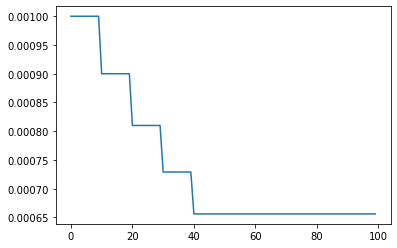

In [10]:
import matplotlib.pyplot as plt
plt.plot(agent.lr_list)

# 80 % drop

In [11]:
total_best = []
total_history = []
for i, seed in enumerate(RandomListOfIntegers):
    config = easydict.EasyDict()
    config.exp_name = "vgg16_exp_cifar100_0"
    config.log_dir = os.path.join("experiments", config.exp_name, "logs/")

    config.load_file = os.path.join("experiments", "vgg16_exp_cifar100_0","checkpoints", "checkpoint.pth")
    config.cuda = True
    config.gpu_device = 1
    config.seed = seed
    config.milestones = [10, 20,30,40]
    config.gamma = 0.9
    config.img_size = 32
    config.num_classes = 100
    config.data_mode = "download"
    config.data_loader_workers = 4
    config.pin_memory = True
    config.async_loading = True
    config.batch_size = 128
    config.async_loading = True
    config.max_epoch = 100
    torch.cuda.init()
    
    agent = globals()["VGG_BN_cifar"](config)
    agent.init_graph()
    agent.load_checkpoint(config.load_file)
    agent.compress(method = 'random',k=0.48)
    best,history = agent.train(specializing=False, freeze_conv=False,cosine_decay = False)
    total_best.append(best)
    total_history.append(history)
    summary(agent.model, torch.zeros((1, 3, 32, 32)).to(torch.device("cuda")))

    

Files already downloaded and verified


Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 7

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 4.3900820934559075	Top1 Acc: 0.05328


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 4.0730193144158475	Top1 Acc: 0.0887


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 3.9032170595720297	Top1 Acc: 0.11830000000953675


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 3.637691322761246	Top1 Acc: 0.159


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 3.4791703852241302	Top1 Acc: 0.18974


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 3.1828869445414485	Top1 Acc: 0.2338


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 3.0523344031380266	Top1 Acc: 0.2613599999904633


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.781501072871534	Top1 Acc: 0.3091


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 2.655702373255854	Top1 Acc: 0.3425400000095367


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.422017501879342	Top1 Acc: 0.3906


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 2.3015404997579276	Top1 Acc: 0.41938000002861026


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.164902353588539	Top1 Acc: 0.4452


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.9994453521030944	Top1 Acc: 0.48751999999046325


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.9077388440506369	Top1 Acc: 0.5019


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.7573015168499764	Top1 Acc: 0.5411400000286102


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.7450287100634998	Top1 Acc: 0.5413


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.5728146792067896	Top1 Acc: 0.5843799999809265


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.6430834863759294	Top1 Acc: 0.5603


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.4210273780481284	Top1 Acc: 0.6214199999809266


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.583984678304648	Top1 Acc: 0.5793


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.3011432151355402	Top1 Acc: 0.6473200000572205


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.5193596369103541	Top1 Acc: 0.5974


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.2086919722959513	Top1 Acc: 0.6696400000572205


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.497020760668984	Top1 Acc: 0.6046


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.129210125912181	Top1 Acc: 0.68822


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.4748945281475405	Top1 Acc: 0.6082


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.056485274868548	Top1 Acc: 0.7061200000572204


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.430130837838861	Top1 Acc: 0.6202


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.0047890330519518	Top1 Acc: 0.719300000038147


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.4188455222528191	Top1 Acc: 0.6249


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.9486371118699193	Top1 Acc: 0.73416


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.4127527339549004	Top1 Acc: 0.6284


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.9175065575963091	Top1 Acc: 0.740260000038147


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.4264795101141627	Top1 Acc: 0.6307


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.8766636192951056	Top1 Acc: 0.7513800000190735


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.3950922753237471	Top1 Acc: 0.6354


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.8400625601753859	Top1 Acc: 0.76026


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.4020594833772393	Top1 Acc: 0.6368


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.8072472376286831	Top1 Acc: 0.7696600000190735


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.3976810566986664	Top1 Acc: 0.6406


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.7577798951159963	Top1 Acc: 0.7827600000381469


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.3695220856726924	Top1 Acc: 0.6453


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.7253550514388267	Top1 Acc: 0.7904600000572205


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.3798275529583799	Top1 Acc: 0.6486


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.7009423648762276	Top1 Acc: 0.7956600000190734


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.3882235348979128	Top1 Acc: 0.6479


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.6822353458922842	Top1 Acc: 0.80078


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.3743746582465837	Top1 Acc: 0.6507


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.6597592309307869	Top1 Acc: 0.8079400000572204


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.3932125726832618	Top1 Acc: 0.6489


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.6347111090064963	Top1 Acc: 0.813680000038147


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.397388120995292	Top1 Acc: 0.6503


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.6167976410340166	Top1 Acc: 0.8182


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.3983230017408539	Top1 Acc: 0.6462


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.5925286270468436	Top1 Acc: 0.82466


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.38082161508029	Top1 Acc: 0.6565


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.5830922761689061	Top1 Acc: 0.8283800000190735


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.405779857424241	Top1 Acc: 0.6498


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.5660082692532893	Top1 Acc: 0.832240000038147


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.4263551989688148	Top1 Acc: 0.6492


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.5400585713593856	Top1 Acc: 0.83938


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.3947578034823453	Top1 Acc: 0.6542


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.5174838730593776	Top1 Acc: 0.8470000000572204


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.3896128950239737	Top1 Acc: 0.6577


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.4973308355607035	Top1 Acc: 0.851720000038147


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.4085610056225257	Top1 Acc: 0.6567


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.49087838535113715	Top1 Acc: 0.8527400000190735


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.4155720080001444	Top1 Acc: 0.6591


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.47531580029393705	Top1 Acc: 0.8581200000190735


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.4159162021890472	Top1 Acc: 0.6582


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.466017878993088	Top1 Acc: 0.8597200000190734


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.432027281085147	Top1 Acc: 0.6573


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.4554277348243977	Top1 Acc: 0.86386


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.463277207145208	Top1 Acc: 0.6524


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.4445448997609146	Top1 Acc: 0.8666399999809266


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.4422034915489486	Top1 Acc: 0.66


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.43200837856973223	Top1 Acc: 0.8711400000572205


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.4343873737733575	Top1 Acc: 0.6573


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.4265080991074862	Top1 Acc: 0.8706800000190735


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.4505302408073522	Top1 Acc: 0.6568


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.40202652089431157	Top1 Acc: 0.8774399999809265


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.4471079865588417	Top1 Acc: 0.6586


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.3883894997484544	Top1 Acc: 0.88218


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.4416339080544966	Top1 Acc: 0.6595


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.3738223997985615	Top1 Acc: 0.8877799999809265


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.4763855541808695	Top1 Acc: 0.6601


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.371709003968312	Top1 Acc: 0.8880000000381469


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.461557564856131	Top1 Acc: 0.6582


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.3600946827160428	Top1 Acc: 0.8919000000572205


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.4954186662842957	Top1 Acc: 0.6522


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.3518235002789656	Top1 Acc: 0.891600000038147


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.465043817139879	Top1 Acc: 0.6586


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.35296640265018436	Top1 Acc: 0.8931000000572205


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.4815617467783675	Top1 Acc: 0.6613


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.3445896844729743	Top1 Acc: 0.896340000038147


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.507075249394284	Top1 Acc: 0.6539


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.34094903993484615	Top1 Acc: 0.8969799999809265


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.4904226313663433	Top1 Acc: 0.6556


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.3335780662953701	Top1 Acc: 0.8983800000190735


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.4985030316099335	Top1 Acc: 0.6565


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.3255424007125523	Top1 Acc: 0.9012400000572205


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5143372952183591	Top1 Acc: 0.6554


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.31904932616464315	Top1 Acc: 0.9033600000190735


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.497004032889499	Top1 Acc: 0.6667


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.3160949175620018	Top1 Acc: 0.90308


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.4960543460483793	Top1 Acc: 0.6602


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.29967223187846603	Top1 Acc: 0.908920000038147


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.521299193177042	Top1 Acc: 0.6627


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.2994668433809524	Top1 Acc: 0.9090399999809265


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5192942392976978	Top1 Acc: 0.6615


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.291097992254645	Top1 Acc: 0.9114400000572205


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5268391687658769	Top1 Acc: 0.6593


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.2988885816024697	Top1 Acc: 0.9091199999809265


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5225185653831386	Top1 Acc: 0.6584


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.2797335839980399	Top1 Acc: 0.9154000000381469


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5198253755328022	Top1 Acc: 0.6642


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.2767016586783292	Top1 Acc: 0.9162600000190735


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5309187958512125	Top1 Acc: 0.6598


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.2786318844998889	Top1 Acc: 0.9150399999809266


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.540740408474886	Top1 Acc: 0.6605


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.275553461402426	Top1 Acc: 0.9168599999809265


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.5594782889643801	Top1 Acc: 0.6567


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.26825680486533954	Top1 Acc: 0.91848


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5379385344589813	Top1 Acc: 0.6632


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.2661415356809221	Top1 Acc: 0.9193400000190735


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5610738494728185	Top1 Acc: 0.6556


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.2640558576111294	Top1 Acc: 0.9198799999809265


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.5605880489832238	Top1 Acc: 0.6579


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.2590890442738143	Top1 Acc: 0.9203599999809265


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.5769337053540387	Top1 Acc: 0.6546


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.25237786316353344	Top1 Acc: 0.9246200000381469


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.5423039062113701	Top1 Acc: 0.6586


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.25505945551425907	Top1 Acc: 0.9215200000572205


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5744591151611715	Top1 Acc: 0.6588


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.24745029033831015	Top1 Acc: 0.92326


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.5608355327497554	Top1 Acc: 0.6617


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.24167164336994787	Top1 Acc: 0.9263999999809265


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.5723677285109894	Top1 Acc: 0.6613


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.24242766352032152	Top1 Acc: 0.925700000038147


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.5880956302715252	Top1 Acc: 0.6561


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.2328501443195221	Top1 Acc: 0.9282399999809265


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.5813491042656234	Top1 Acc: 0.6611


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.2307830765805281	Top1 Acc: 0.930780000038147


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.5672269652161417	Top1 Acc: 0.6594


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.229600801968666	Top1 Acc: 0.9297200000190735


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.5599108240272426	Top1 Acc: 0.6616


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.2244919835377837	Top1 Acc: 0.9313


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.5739707463904271	Top1 Acc: 0.6591


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.22326502809896492	Top1 Acc: 0.9317000000572204


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.5779559069041964	Top1 Acc: 0.6579


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.2183173139153234	Top1 Acc: 0.9335000000381469


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.5937383114537107	Top1 Acc: 0.656


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.2170086030078971	Top1 Acc: 0.9340399999809265


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.5947090417523928	Top1 Acc: 0.6616


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.2117817388737903	Top1 Acc: 0.935560000038147


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.6012398804290384	Top1 Acc: 0.6574


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.21541807695727824	Top1 Acc: 0.9346000000190735


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.6213035945650898	Top1 Acc: 0.6549


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.20511660336152368	Top1 Acc: 0.9365400000572205


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.5948099486435516	Top1 Acc: 0.6595


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.20235949301201364	Top1 Acc: 0.9385199999809265


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.5934524113618875	Top1 Acc: 0.6641


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.2012814359591745	Top1 Acc: 0.93848


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.6095497683633733	Top1 Acc: 0.6592


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.20724406538297757	Top1 Acc: 0.937000000038147


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.6196363666389562	Top1 Acc: 0.6572


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.19463730380510735	Top1 Acc: 0.939580000038147


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.635335901115514	Top1 Acc: 0.6562


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.19233484810118176	Top1 Acc: 0.9414599999809266


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.635423637643645	Top1 Acc: 0.6552


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.19635065768838234	Top1 Acc: 0.9406799999809266


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.6308518602878233	Top1 Acc: 0.6565


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.2016297691808942	Top1 Acc: 0.93848


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.6260489828978912	Top1 Acc: 0.6615


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.19502765186073834	Top1 Acc: 0.9397


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.6339478492736816	Top1 Acc: 0.653


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.1856782460285117	Top1 Acc: 0.9440600000381469


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.6140335451198529	Top1 Acc: 0.6612


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.18129226590132774	Top1 Acc: 0.9447399999809265


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.6047208354442934	Top1 Acc: 0.6634


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.18388937530881913	Top1 Acc: 0.94494


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.6275700406183171	Top1 Acc: 0.6596


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.1830403209018433	Top1 Acc: 0.9432599999809265


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.6254838780511784	Top1 Acc: 0.6606


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.18394641673473447	Top1 Acc: 0.9445000000190735


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.6165360936635658	Top1 Acc: 0.6641


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.18034686383498294	Top1 Acc: 0.9446399999809265


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.6199804499179502	Top1 Acc: 0.6625


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.1720104099768202	Top1 Acc: 0.9477


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.640894016133079	Top1 Acc: 0.6555


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.1752219982731068	Top1 Acc: 0.9466600000572205


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.6478001513058627	Top1 Acc: 0.6599


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.17182829527332044	Top1 Acc: 0.94784


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.6325675430177133	Top1 Acc: 0.6596


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.1634726327417604	Top1 Acc: 0.9504400000572205


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.6597244226479833	Top1 Acc: 0.6545


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.1706183241475421	Top1 Acc: 0.9473600000572204


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.643510172638712	Top1 Acc: 0.6601


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.16861330098508265	Top1 Acc: 0.9487800000572204


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 70.52it/s]


Validation results at epoch-99 | loss: 1.6447278608249714	Top1 Acc: 0.662
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 61, 3, 3]  [1, 61, 16, 16]    16.531k   
8_features.BatchNorm2d_8                [61]  [1, 61, 16, 16]      122.0   
9_features.ReLU_9                          -  [1, 61, 16, 16]          -   
10_features.Co

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 7

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 4.394430343452317	Top1 Acc: 0.050540000002384185


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 4.05920901781396	Top1 Acc: 0.0942


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 3.8822387789216495	Top1 Acc: 0.12172000001430512


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 3.621799127965034	Top1 Acc: 0.1569


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 3.4722617904243567	Top1 Acc: 0.18540000002861023


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 3.226320474962645	Top1 Acc: 0.2229


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 3.0646535368526684	Top1 Acc: 0.25896000002861025


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.801429769660853	Top1 Acc: 0.3077


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 2.6755136937436546	Top1 Acc: 0.33669999999046324


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.4360862713825853	Top1 Acc: 0.3813


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 2.3197872382600595	Top1 Acc: 0.41632000002861025


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.142014136797265	Top1 Acc: 0.4489


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 2.0086321361229547	Top1 Acc: 0.48803999999046327


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.906573158276232	Top1 Acc: 0.5078


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.76644437941139	Top1 Acc: 0.5404600000190735


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.7250991607014137	Top1 Acc: 0.5473


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.5659605450642384	Top1 Acc: 0.587640000038147


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.6478991538663454	Top1 Acc: 0.5633


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.4237027348154951	Top1 Acc: 0.6203


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.5975827235209792	Top1 Acc: 0.5815


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.2819043690591212	Top1 Acc: 0.653480000038147


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.5091999678672114	Top1 Acc: 0.5982


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.1928972382374736	Top1 Acc: 0.6727600000572205


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.4562242815766153	Top1 Acc: 0.6153


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.1195274571628522	Top1 Acc: 0.6916399999809265


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.4487140405027172	Top1 Acc: 0.62


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.048770904388574	Top1 Acc: 0.710060000038147


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.4688445782359643	Top1 Acc: 0.6153


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.9974567204180276	Top1 Acc: 0.7221000000190735


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.4177138133894038	Top1 Acc: 0.6286


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.9457299023333108	Top1 Acc: 0.7364


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.4115079022661041	Top1 Acc: 0.635


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.9020290152191202	Top1 Acc: 0.7469600000572204


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.4185407448418532	Top1 Acc: 0.6309


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.8643010744963155	Top1 Acc: 0.7536800000190735


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.4154697219027748	Top1 Acc: 0.6404


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.8287827087485272	Top1 Acc: 0.763160000038147


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.4280248367333714	Top1 Acc: 0.6384


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.7944971537955886	Top1 Acc: 0.7714800000190735


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.3972212030917783	Top1 Acc: 0.6435


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.7462861567659451	Top1 Acc: 0.7870800000190735


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.3853974070730088	Top1 Acc: 0.6465


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.7160971336200109	Top1 Acc: 0.7944


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.3821688626385942	Top1 Acc: 0.6503


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.694649431559131	Top1 Acc: 0.7979400000572204


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.3805635216869885	Top1 Acc: 0.6529


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.6748266472383533	Top1 Acc: 0.802560000038147


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.4110035752948327	Top1 Acc: 0.6458


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.6463775313876169	Top1 Acc: 0.811680000038147


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.4064627070970173	Top1 Acc: 0.6476


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.6297667082923147	Top1 Acc: 0.815660000038147


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.3849546011490157	Top1 Acc: 0.6573


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.6146265201251525	Top1 Acc: 0.81994


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.4042904045008406	Top1 Acc: 0.655


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.5849850885093669	Top1 Acc: 0.8278999999809266


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.4252034704896468	Top1 Acc: 0.6482


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.572826624907496	Top1 Acc: 0.8305200000572205


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.4264547711686244	Top1 Acc: 0.6499


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.5587251167315657	Top1 Acc: 0.8339000000190735


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.4569952985908412	Top1 Acc: 0.6496


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.5174296341283852	Top1 Acc: 0.8466200000190734


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.4354122409337684	Top1 Acc: 0.652


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.5117800772342536	Top1 Acc: 0.8479000000572204


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.425659790069242	Top1 Acc: 0.6581


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.49774508677480167	Top1 Acc: 0.8510399999809265


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.4413192219372037	Top1 Acc: 0.6584


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.4831392433484802	Top1 Acc: 0.8569000000190735


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.4445745462103734	Top1 Acc: 0.6597


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.4846677977944274	Top1 Acc: 0.8546400000190735


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.444011208377307	Top1 Acc: 0.6582


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.4572421885512369	Top1 Acc: 0.8635400000572204


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.4439741931384122	Top1 Acc: 0.6571


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.4461804180194045	Top1 Acc: 0.8673200000190735


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.4640643370302417	Top1 Acc: 0.6585


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.43350246998355213	Top1 Acc: 0.870500000038147


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.4668816539305676	Top1 Acc: 0.6548


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.4251987962314235	Top1 Acc: 0.873060000038147


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.4979380550263803	Top1 Acc: 0.6554


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.4128491421947089	Top1 Acc: 0.8764000000572204


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.4678561596930781	Top1 Acc: 0.6585


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.3916075846651936	Top1 Acc: 0.8820799999809266


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.4803734602807443	Top1 Acc: 0.6608


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.38087089843762195	Top1 Acc: 0.8856199999809266


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.4717760727375369	Top1 Acc: 0.658


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.37702408444393626	Top1 Acc: 0.886820000038147


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.4941110558147672	Top1 Acc: 0.6529


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.36584382647138725	Top1 Acc: 0.8901


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.4883318369901632	Top1 Acc: 0.6535


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.3568059218966443	Top1 Acc: 0.8914999999809265


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.4877855672111995	Top1 Acc: 0.6582


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.34402350704078477	Top1 Acc: 0.8970400000190735


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.5137278098094313	Top1 Acc: 0.6537


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.34808972416936285	Top1 Acc: 0.895140000038147


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.5155871487871002	Top1 Acc: 0.6563


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.33339793679049556	Top1 Acc: 0.8981200000572205


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.525109030777895	Top1 Acc: 0.6512


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.3284202172513813	Top1 Acc: 0.90022


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.5268883071368253	Top1 Acc: 0.6595


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.3264100666317489	Top1 Acc: 0.90006


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5430315144454376	Top1 Acc: 0.6538


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.3198886846794802	Top1 Acc: 0.903120000038147


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.551748275756836	Top1 Acc: 0.6555


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.31467292391125806	Top1 Acc: 0.904820000038147


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5559117658228814	Top1 Acc: 0.6505


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.30863858317322745	Top1 Acc: 0.90668


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5405716918691803	Top1 Acc: 0.6553


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.2999905682433292	Top1 Acc: 0.90716


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5586878476263601	Top1 Acc: 0.6526


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.3014314093476976	Top1 Acc: 0.9097600000572205


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5564684822589536	Top1 Acc: 0.6558


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.28683263415951865	Top1 Acc: 0.914


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5740493098391761	Top1 Acc: 0.6496


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.2800400799802502	Top1 Acc: 0.9153


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5698396465446376	Top1 Acc: 0.6536


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.28513856018748124	Top1 Acc: 0.9143599999809265


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5539916089818449	Top1 Acc: 0.658


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.2779266658379599	Top1 Acc: 0.9158400000190735


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5641959022872056	Top1 Acc: 0.6608


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.27033478726663857	Top1 Acc: 0.9178399999809265


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5684344044214562	Top1 Acc: 0.6591


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.2679844642119944	Top1 Acc: 0.91734


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.5619340471074552	Top1 Acc: 0.6587


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.2641259887448662	Top1 Acc: 0.92006


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5665565638602534	Top1 Acc: 0.6574


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.2627414097756986	Top1 Acc: 0.9191400000190735


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5938143730163574	Top1 Acc: 0.6561


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.25955490402096065	Top1 Acc: 0.9219600000572205


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.6077167746386951	Top1 Acc: 0.6559


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.2550721742269938	Top1 Acc: 0.92302


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.5864775965485391	Top1 Acc: 0.6577


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.24499198996349977	Top1 Acc: 0.925260000038147


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.580900359757339	Top1 Acc: 0.6641


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.24395638561385977	Top1 Acc: 0.9262600000572204


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5895342872112612	Top1 Acc: 0.6609


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.2464457331106181	Top1 Acc: 0.9250999999809265


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.5998301853107502	Top1 Acc: 0.6584


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.24391744979430952	Top1 Acc: 0.92628


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.6168577278716654	Top1 Acc: 0.6555


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.2409494028943579	Top1 Acc: 0.9254600000190735


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.625289594070821	Top1 Acc: 0.6537


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.23713722945098073	Top1 Acc: 0.9271399999809266


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.632508920717843	Top1 Acc: 0.6532


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.229582655422218	Top1 Acc: 0.9308000000572204


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.5984160296524628	Top1 Acc: 0.6568


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.22174642667593553	Top1 Acc: 0.9319000000190735


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.6222457531132275	Top1 Acc: 0.6569


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.22893643963253102	Top1 Acc: 0.930460000038147


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.6406230594538436	Top1 Acc: 0.6509


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.22445127912951857	Top1 Acc: 0.9317400000381469


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.6070869527285612	Top1 Acc: 0.6526


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.21877075577407237	Top1 Acc: 0.93326


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.6459557089624526	Top1 Acc: 0.652


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.21353939371874264	Top1 Acc: 0.9342399999809265


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.6332616775850706	Top1 Acc: 0.6539


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.2105115136260267	Top1 Acc: 0.9360399999809265


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.6215440985522693	Top1 Acc: 0.651


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.211093989060358	Top1 Acc: 0.936200000038147


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.6129067547713654	Top1 Acc: 0.6567


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.20850005728738083	Top1 Acc: 0.937900000038147


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.6420667382735241	Top1 Acc: 0.6523


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.20474617895872696	Top1 Acc: 0.93762


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.6194913387298584	Top1 Acc: 0.6595


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.2033114419378283	Top1 Acc: 0.9364000000572205


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.632338130021397	Top1 Acc: 0.6575


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.19946562468319598	Top1 Acc: 0.9394999999809265


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.6529287824147865	Top1 Acc: 0.6517


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.20059309187142746	Top1 Acc: 0.93846


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.6340897068192688	Top1 Acc: 0.6552


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.19908514047217796	Top1 Acc: 0.9394600000572204


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.6288998775844332	Top1 Acc: 0.6543


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.19583474076769847	Top1 Acc: 0.9394800000190735


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.6634046706972243	Top1 Acc: 0.6531


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.1880932962116988	Top1 Acc: 0.9431400000572204


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.6534047187129153	Top1 Acc: 0.6565


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.180503922312156	Top1 Acc: 0.9453600000572204


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.6550786555567873	Top1 Acc: 0.6614


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.18520677426968085	Top1 Acc: 0.9436


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.6348637002932875	Top1 Acc: 0.6628


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.18062669607570103	Top1 Acc: 0.94512


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.6720788071427164	Top1 Acc: 0.6589


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.17960898764907857	Top1 Acc: 0.94474


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.656627291365515	Top1 Acc: 0.6539


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.17913075589844027	Top1 Acc: 0.9458400000572205


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.674003619181959	Top1 Acc: 0.6575


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.18438852134415562	Top1 Acc: 0.94436


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.6754532479032684	Top1 Acc: 0.6488


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.17833009388898036	Top1 Acc: 0.94574


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.6526271844212013	Top1 Acc: 0.6577


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.1772747483018719	Top1 Acc: 0.9458999999809266


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.6609556463700306	Top1 Acc: 0.6581


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.17729045451640169	Top1 Acc: 0.9443600000190735


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.6819305842435812	Top1 Acc: 0.656


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.16582063093895802	Top1 Acc: 0.9490400000190735


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.685487297516835	Top1 Acc: 0.655


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.16929198147924354	Top1 Acc: 0.94848


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.6832414156273952	Top1 Acc: 0.6529


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.1677253244116026	Top1 Acc: 0.949180000038147


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.6795888233788405	Top1 Acc: 0.6523


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.16459642146783107	Top1 Acc: 0.9512999999809265


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 70.42it/s]


Validation results at epoch-99 | loss: 1.7016203207305716	Top1 Acc: 0.6505
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 61, 3, 3]  [1, 61, 16, 16]    16.531k   
8_features.BatchNorm2d_8                [61]  [1, 61, 16, 16]      122.0   
9_features.ReLU_9                          -  [1, 61, 16, 16]          -   
10_features.C

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 7

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 4.401764224557316	Top1 Acc: 0.04874000000238419


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 4.089009644109992	Top1 Acc: 0.0836


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 3.9318044216126737	Top1 Acc: 0.11816


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 3.6812941545172584	Top1 Acc: 0.1636


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 3.503961359448445	Top1 Acc: 0.19186


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 3.218288195284107	Top1 Acc: 0.2387


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 3.056156662723902	Top1 Acc: 0.2697200000095367


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.765131223050854	Top1 Acc: 0.3205


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 2.6402921481510564	Top1 Acc: 0.3490000000190735


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.4296003927158405	Top1 Acc: 0.3821


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 2.2828894356632476	Top1 Acc: 0.42386000002861024


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.1103643857980074	Top1 Acc: 0.462


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 1.978935669450199	Top1 Acc: 0.49464


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.8882046590877484	Top1 Acc: 0.5105


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.7271465816156333	Top1 Acc: 0.5518600000572205


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.7312021180044246	Top1 Acc: 0.5429


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.544330153014044	Top1 Acc: 0.5908


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.6515190027937103	Top1 Acc: 0.5689


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.3992298067073383	Top1 Acc: 0.62438


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.5919296137894257	Top1 Acc: 0.5842


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.2694176810476787	Top1 Acc: 0.6563000000572204


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.497310745565197	Top1 Acc: 0.5989


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.188731483638744	Top1 Acc: 0.676240000038147


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.4587038861045354	Top1 Acc: 0.6135


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.11102401265098	Top1 Acc: 0.69398


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.4465547309646123	Top1 Acc: 0.6185


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.0462159659246655	Top1 Acc: 0.7105200000190734


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.4250272753872448	Top1 Acc: 0.6225


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 0.9873013179320509	Top1 Acc: 0.72404


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.4127955753591996	Top1 Acc: 0.6273


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.9451038721577286	Top1 Acc: 0.73416


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.4222264848177946	Top1 Acc: 0.6304


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.8964791476269207	Top1 Acc: 0.74764


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.4206478573098968	Top1 Acc: 0.6325


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.8620711749471972	Top1 Acc: 0.753240000038147


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.3996025625663469	Top1 Acc: 0.639


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.8203788848636705	Top1 Acc: 0.7659200000572205


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.401854694644107	Top1 Acc: 0.641


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.7975221716839335	Top1 Acc: 0.770940000038147


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.412264281435858	Top1 Acc: 0.6368


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.7496094202141628	Top1 Acc: 0.78584


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.380699336528778	Top1 Acc: 0.6451


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.7141814209006326	Top1 Acc: 0.7940800000190735


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.3898392002793807	Top1 Acc: 0.6492


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.6866397647296681	Top1 Acc: 0.8004


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.3725864600531663	Top1 Acc: 0.6537


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.6688109826096489	Top1 Acc: 0.805040000038147


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.397375087949294	Top1 Acc: 0.6475


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.6468080959813979	Top1 Acc: 0.81104


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.4155683351468435	Top1 Acc: 0.6495


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.623323236661189	Top1 Acc: 0.8184000000190735


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.3906313709065885	Top1 Acc: 0.6564


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.6116588070721882	Top1 Acc: 0.819480000038147


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.4039343686043462	Top1 Acc: 0.6507


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.5933313516094861	Top1 Acc: 0.8246400000190734


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.4219684555560728	Top1 Acc: 0.6519


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.5748122393932489	Top1 Acc: 0.830460000038147


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.446558034872707	Top1 Acc: 0.6481


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.5532282084760154	Top1 Acc: 0.8368


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.4161598742762698	Top1 Acc: 0.6522


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.5321388753021464	Top1 Acc: 0.841540000038147


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.4347458006460456	Top1 Acc: 0.6525


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.5082198498041733	Top1 Acc: 0.8492799999809265


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.4216265987746324	Top1 Acc: 0.6556


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.5008797775906371	Top1 Acc: 0.8491400000572205


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.4411026201670682	Top1 Acc: 0.6533


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.4809888170655731	Top1 Acc: 0.8574200000190735


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.4545786841006219	Top1 Acc: 0.6531


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.4698155546737144	Top1 Acc: 0.85982


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.4490110059327717	Top1 Acc: 0.6517


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.46166529233955667	Top1 Acc: 0.8626800000190735


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.4693552421618112	Top1 Acc: 0.6501


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.448112134395353	Top1 Acc: 0.8650200000190735


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.4620156001441087	Top1 Acc: 0.6533


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.4434413976605286	Top1 Acc: 0.8671799999809265


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.4427485134028182	Top1 Acc: 0.6599


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.4200612138528043	Top1 Acc: 0.8735199999809266


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.445947212508962	Top1 Acc: 0.6543


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.418766120320086	Top1 Acc: 0.8747199999809265


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.4753110861476464	Top1 Acc: 0.656


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.3999371304155311	Top1 Acc: 0.8784600000572205


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.4758612566356417	Top1 Acc: 0.6522


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.38724075555039184	Top1 Acc: 0.884360000038147


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.4656676785855354	Top1 Acc: 0.654


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.37272492840009575	Top1 Acc: 0.8860000000190735


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.4846762162220628	Top1 Acc: 0.6567


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.3749489227829077	Top1 Acc: 0.8865800000572205


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.4855982185919074	Top1 Acc: 0.6574


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.35871890023388825	Top1 Acc: 0.8924


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.4754397340967684	Top1 Acc: 0.6565


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.3542899394889012	Top1 Acc: 0.89226


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.4801933290083198	Top1 Acc: 0.6637


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.34029035106339417	Top1 Acc: 0.8964800000190735


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.4798203706741333	Top1 Acc: 0.659


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.33753671895360093	Top1 Acc: 0.8984600000190734


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.486790098721468	Top1 Acc: 0.6587


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.33150378273576114	Top1 Acc: 0.8985400000190735


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.4916250328474407	Top1 Acc: 0.6543


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.3286600617115455	Top1 Acc: 0.8999000000190734


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5038000526307505	Top1 Acc: 0.654


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.31935731182470345	Top1 Acc: 0.9035999999809265


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.4899175800854647	Top1 Acc: 0.6572


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.30905956574870497	Top1 Acc: 0.9066800000572205


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.532733683344684	Top1 Acc: 0.6524


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.30366101853377986	Top1 Acc: 0.9068799999809265


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5253717884232727	Top1 Acc: 0.6561


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.3003479632575189	Top1 Acc: 0.90934


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5242796977864037	Top1 Acc: 0.6584


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.2990746166547546	Top1 Acc: 0.9093200000190735


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5119783697249014	Top1 Acc: 0.6574


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.28860895427139216	Top1 Acc: 0.9109200000572205


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5312565761276438	Top1 Acc: 0.6531


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.28872545699939095	Top1 Acc: 0.9122400000572205


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.537446621098096	Top1 Acc: 0.6585


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.27905057601230526	Top1 Acc: 0.9154200000572205


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5465259748169138	Top1 Acc: 0.6578


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.28221374014606865	Top1 Acc: 0.9140799999809265


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5466391572469398	Top1 Acc: 0.6591


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.27955001851786737	Top1 Acc: 0.9141200000190735


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.534315807155416	Top1 Acc: 0.6557


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.2714371746572692	Top1 Acc: 0.9181399999809265


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.559113876729072	Top1 Acc: 0.6575


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.2651149272118383	Top1 Acc: 0.920600000038147


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5587860783444176	Top1 Acc: 0.6583


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.270499368858002	Top1 Acc: 0.9171800000190735


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5622821812388263	Top1 Acc: 0.6546


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.2600534654143826	Top1 Acc: 0.9196600000190734


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.5769108805475356	Top1 Acc: 0.6538


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.24833949977327185	Top1 Acc: 0.923860000038147


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.5661174360709855	Top1 Acc: 0.6572


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.25184532794196285	Top1 Acc: 0.9240800000572205


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.5713362014746364	Top1 Acc: 0.6535


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.25106448950746174	Top1 Acc: 0.924560000038147


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5461472182334224	Top1 Acc: 0.659


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.24516781209908484	Top1 Acc: 0.9245199999809265


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.5418134988108767	Top1 Acc: 0.6626


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.23557874406009074	Top1 Acc: 0.9286800000572205


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.5773094092743307	Top1 Acc: 0.6561


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.23000603759913799	Top1 Acc: 0.9289400000572204


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.5584666744063171	Top1 Acc: 0.6602


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.22849764587248073	Top1 Acc: 0.9311


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.5811546829682361	Top1 Acc: 0.6604


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.23398127418268672	Top1 Acc: 0.92912


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.597140878061705	Top1 Acc: 0.6545


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.22702493815851943	Top1 Acc: 0.9310000000190735


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.5788274128225785	Top1 Acc: 0.6585


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.22436212870242345	Top1 Acc: 0.931440000038147


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.5712871430795403	Top1 Acc: 0.6627


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.22024315995785892	Top1 Acc: 0.9335400000572205


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.5973810953429983	Top1 Acc: 0.6582


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.21738573024644875	Top1 Acc: 0.93352


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.606182774410972	Top1 Acc: 0.6584


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.21411724727781836	Top1 Acc: 0.9356199999809265


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.5956766409210013	Top1 Acc: 0.6562


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.20983954338009095	Top1 Acc: 0.9378200000190735


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.6085942108419877	Top1 Acc: 0.6535


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.21157620595696638	Top1 Acc: 0.9349799999809265


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.6124107852766785	Top1 Acc: 0.6613


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.21172141600066743	Top1 Acc: 0.9356400000572205


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.6081614931927453	Top1 Acc: 0.6539


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.20739847454039947	Top1 Acc: 0.937120000038147


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.606800049166136	Top1 Acc: 0.6601


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.2064992288875458	Top1 Acc: 0.9369599999809265


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.6359147240843954	Top1 Acc: 0.6594


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.20630388872702712	Top1 Acc: 0.93644


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.613296545004543	Top1 Acc: 0.6587


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.19590972294397366	Top1 Acc: 0.939420000038147


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.615922272959842	Top1 Acc: 0.6559


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.19178806937030515	Top1 Acc: 0.9437600000572205


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.6312194172340104	Top1 Acc: 0.6601


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.1897412245078465	Top1 Acc: 0.9424800000572204


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.6111924240860758	Top1 Acc: 0.6607


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.1955527623596094	Top1 Acc: 0.940200000038147


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.6092891678025452	Top1 Acc: 0.6605


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.19317220065676038	Top1 Acc: 0.9406000000572204


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.6129829370522801	Top1 Acc: 0.6614


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.1857891503121237	Top1 Acc: 0.9432600000190735


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.6424741775174685	Top1 Acc: 0.6553


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.18819409088634165	Top1 Acc: 0.9417600000572205


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.618071501768088	Top1 Acc: 0.6614


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.18220669619948662	Top1 Acc: 0.9444000000190735


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.619344113748285	Top1 Acc: 0.6576


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.17345174012319817	Top1 Acc: 0.9468200000381469


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.6261950452116471	Top1 Acc: 0.658


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.17833139854090294	Top1 Acc: 0.945000000038147


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.6098391089258315	Top1 Acc: 0.661


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.17771303515566889	Top1 Acc: 0.9461800000190735


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.615959021109569	Top1 Acc: 0.6597


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.17695230680048618	Top1 Acc: 0.9468800000190735


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.622098371952395	Top1 Acc: 0.6641


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.17760312448605856	Top1 Acc: 0.9460199999809266


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.6220236579074134	Top1 Acc: 0.6609


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.16864238768015677	Top1 Acc: 0.94792


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.6514337243913095	Top1 Acc: 0.6556


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.1642981830631833	Top1 Acc: 0.9501600000381469


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.6432493276233915	Top1 Acc: 0.658


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.16690165781990038	Top1 Acc: 0.9506999999809265


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.656038930144491	Top1 Acc: 0.6616


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.16574859304729936	Top1 Acc: 0.9489200000190735


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 75.21it/s]


Validation results at epoch-99 | loss: 1.6306109956548185	Top1 Acc: 0.6584
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 61, 3, 3]  [1, 61, 16, 16]    16.531k   
8_features.BatchNorm2d_8                [61]  [1, 61, 16, 16]      122.0   
9_features.ReLU_9                          -  [1, 61, 16, 16]          -   
10_features.C

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 7

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 4.355899530908336	Top1 Acc: 0.05578


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 4.032729338996018	Top1 Acc: 0.0928


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 3.8892805649496407	Top1 Acc: 0.11933999999761581


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 3.6647578130794476	Top1 Acc: 0.1466


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 3.5255436159460745	Top1 Acc: 0.17710000000953674


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 3.2775285787220243	Top1 Acc: 0.2184


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 3.1296497427898906	Top1 Acc: 0.25280000000953673


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.860457281523113	Top1 Acc: 0.2973


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 2.7286323354677164	Top1 Acc: 0.3302400000190735


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.469381751893442	Top1 Acc: 0.3768


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 2.3557650823422405	Top1 Acc: 0.4068200000190735


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.1644573573824726	Top1 Acc: 0.4478


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 2.0385829737729124	Top1 Acc: 0.4782


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.9302479737921605	Top1 Acc: 0.4976


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.7782838695189531	Top1 Acc: 0.536060000038147


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.753439503380015	Top1 Acc: 0.5386


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.5891865958338198	Top1 Acc: 0.5804600000095368


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.62666899493978	Top1 Acc: 0.5702


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.433574024063852	Top1 Acc: 0.6164800000572205


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.5683567388148247	Top1 Acc: 0.5843


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.2985335711932853	Top1 Acc: 0.64768


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.5426044177405442	Top1 Acc: 0.5928


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.2003677449262966	Top1 Acc: 0.6718000000190735


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.470487495011921	Top1 Acc: 0.609


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.1239909054068349	Top1 Acc: 0.6896400000190734


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.4686894115013411	Top1 Acc: 0.6092


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.0678555171203126	Top1 Acc: 0.7037800000190735


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.471507433094556	Top1 Acc: 0.6167


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.0122331611030853	Top1 Acc: 0.7168200000572205


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.4140355481377131	Top1 Acc: 0.6279


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.9578858165789748	Top1 Acc: 0.7310599999809265


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.4187172922906996	Top1 Acc: 0.6298


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.9181975941828755	Top1 Acc: 0.7415000000572205


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.387525689752796	Top1 Acc: 0.6392


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.8671994564478355	Top1 Acc: 0.7528799999809265


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.397847342340252	Top1 Acc: 0.6404


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.8401006944953938	Top1 Acc: 0.7615999999809265


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.412096675438217	Top1 Acc: 0.6362


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.8075406949233521	Top1 Acc: 0.7712200000572205


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.3922772980943512	Top1 Acc: 0.6456


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.7519468389965994	Top1 Acc: 0.784720000038147


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.3987930998017517	Top1 Acc: 0.6449


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.7231908493182239	Top1 Acc: 0.7898800000190734


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.3864683682405496	Top1 Acc: 0.6479


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.7052087673293356	Top1 Acc: 0.7955800000190735


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.3946318279338787	Top1 Acc: 0.6443


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.6727944629271622	Top1 Acc: 0.8048199999809265


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.3831080039845238	Top1 Acc: 0.653


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.6548843177230766	Top1 Acc: 0.8069600000190735


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.392379226563852	Top1 Acc: 0.6484


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.6337224397512958	Top1 Acc: 0.8154800000572204


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.4077787037137188	Top1 Acc: 0.6548


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.6115164647016988	Top1 Acc: 0.8196599999809265


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.400127519535113	Top1 Acc: 0.6567


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.597865935710385	Top1 Acc: 0.8250399999809265


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.42117105330093	Top1 Acc: 0.6583


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.5808849433041594	Top1 Acc: 0.82858


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.4310525587842435	Top1 Acc: 0.6491


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.5563557799667349	Top1 Acc: 0.8353800000381469


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.426701550242267	Top1 Acc: 0.6509


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.5380040623647783	Top1 Acc: 0.8417400000572205


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.4210741323760794	Top1 Acc: 0.6556


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.5152195277421371	Top1 Acc: 0.84808


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.4281672239303589	Top1 Acc: 0.6549


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.5007916327632601	Top1 Acc: 0.85052


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.4183796764929084	Top1 Acc: 0.6601


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.495806187086398	Top1 Acc: 0.8532799999809265


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.430014150052131	Top1 Acc: 0.6598


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.4823440601453757	Top1 Acc: 0.8569799999809266


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.4354793806619282	Top1 Acc: 0.6582


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.4647509636705184	Top1 Acc: 0.8604400000190735


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.4284503301487694	Top1 Acc: 0.6625


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.4552153261649944	Top1 Acc: 0.8640000000190735


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.4483235425586942	Top1 Acc: 0.6575


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.4497272302503781	Top1 Acc: 0.8648200000572205


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.458780365654185	Top1 Acc: 0.6552


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.4335794262873852	Top1 Acc: 0.870840000038147


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.476471860197526	Top1 Acc: 0.6546


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.42556637533180547	Top1 Acc: 0.8725200000190735


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.44854246513753	Top1 Acc: 0.6639


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.4000896117114045	Top1 Acc: 0.8793400000381469


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.4381339187863507	Top1 Acc: 0.6645


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.3870305781016874	Top1 Acc: 0.8816600000190735


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.4538952610160731	Top1 Acc: 0.6608


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.3898782977820053	Top1 Acc: 0.8839000000572205


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.468315844294391	Top1 Acc: 0.6575


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.3695644918457626	Top1 Acc: 0.8889800000572204


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.4804609372645994	Top1 Acc: 0.6606


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.36135411811301776	Top1 Acc: 0.8914400000190735


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.45410840722579	Top1 Acc: 0.6697


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.35793546566268064	Top1 Acc: 0.8927599999809265


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.4908802728109722	Top1 Acc: 0.661


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.3466583090974852	Top1 Acc: 0.89272


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.4845360117622568	Top1 Acc: 0.6639


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.342317291537819	Top1 Acc: 0.8944799999809265


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.4922338527969168	Top1 Acc: 0.6605


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.3345329566761051	Top1 Acc: 0.8983799999809265


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.4937086210975163	Top1 Acc: 0.659


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.33339305816556486	Top1 Acc: 0.8987000000572205


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.5153083001511007	Top1 Acc: 0.6571


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.3253253792481654	Top1 Acc: 0.9005800000572205


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.501608513578584	Top1 Acc: 0.6626


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.3225292140794227	Top1 Acc: 0.9013200000381469


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.4954957026469557	Top1 Acc: 0.6637


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.3098849579501335	Top1 Acc: 0.9059200000572205


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.509001202221158	Top1 Acc: 0.6623


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.30838781448505115	Top1 Acc: 0.904940000038147


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.529209094711497	Top1 Acc: 0.6556


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.3018117875165647	Top1 Acc: 0.9081399999809265


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5154246846331825	Top1 Acc: 0.6605


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.2911729635789876	Top1 Acc: 0.91132


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5223404131358182	Top1 Acc: 0.6613


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.29250748634643264	Top1 Acc: 0.9119999999809265


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5616386872303636	Top1 Acc: 0.655


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.2917843759059906	Top1 Acc: 0.91168


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5343294739723206	Top1 Acc: 0.6613


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.28414381339269523	Top1 Acc: 0.9132400000190735


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5350291185741183	Top1 Acc: 0.6619


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.2791624252524827	Top1 Acc: 0.9151800000381469


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.548702679857423	Top1 Acc: 0.6541


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.2671479706264213	Top1 Acc: 0.92032


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.5852614641189575	Top1 Acc: 0.6565


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.26659235628821965	Top1 Acc: 0.919100000038147


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5671307784092576	Top1 Acc: 0.6563


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.26959010568040104	Top1 Acc: 0.917380000038147


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5476844733274435	Top1 Acc: 0.6606


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.2698319741450917	Top1 Acc: 0.9183599999809265


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.5615548951716363	Top1 Acc: 0.6601


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.25264506141090637	Top1 Acc: 0.92358


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.570260075074208	Top1 Acc: 0.656


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.24964986347100315	Top1 Acc: 0.9245000000190735


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.584779134279565	Top1 Acc: 0.6597


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.2464491755265714	Top1 Acc: 0.9242399999809265


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5932394039781788	Top1 Acc: 0.6559


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.2464550090453509	Top1 Acc: 0.9247800000190735


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.5767691180675845	Top1 Acc: 0.6584


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.2461648178870416	Top1 Acc: 0.925700000038147


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.5854526773283752	Top1 Acc: 0.6575


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.24130903752258673	Top1 Acc: 0.926100000038147


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.5939260343962078	Top1 Acc: 0.6621


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.23146926463031403	Top1 Acc: 0.9296800000190735


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.5601143580448777	Top1 Acc: 0.6618


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.23884233784721332	Top1 Acc: 0.926600000038147


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.583411200137078	Top1 Acc: 0.659


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.2297979432070042	Top1 Acc: 0.92914


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.5798270506194876	Top1 Acc: 0.6585


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.2231743636033724	Top1 Acc: 0.9314599999809265


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.5851981126809422	Top1 Acc: 0.6592


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.22772295548178045	Top1 Acc: 0.9306400000572205


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.5911476234846478	Top1 Acc: 0.6608


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.22311186163550448	Top1 Acc: 0.93228


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.5666185813614084	Top1 Acc: 0.6607


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.2191728958502755	Top1 Acc: 0.933480000038147


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.5997898337207264	Top1 Acc: 0.6645


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.21323720685889958	Top1 Acc: 0.93486


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.5971467404425899	Top1 Acc: 0.6549


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.2120152568954336	Top1 Acc: 0.9353400000190735


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.602176910714258	Top1 Acc: 0.6622


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.2085530705692823	Top1 Acc: 0.9357600000572205


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.6032166647005686	Top1 Acc: 0.6585


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.20158609658327248	Top1 Acc: 0.9374


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.5917177305945867	Top1 Acc: 0.6625


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.20169205593940853	Top1 Acc: 0.9381600000381469


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.6351725149758254	Top1 Acc: 0.6623


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.20154291271324962	Top1 Acc: 0.9386799999809265


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.6487871830976462	Top1 Acc: 0.6582


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.1993516063331948	Top1 Acc: 0.9395999999809265


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.6009935668752164	Top1 Acc: 0.6627


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.20205861221417745	Top1 Acc: 0.9383399999809265


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.6129023410096954	Top1 Acc: 0.6635


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.19187926827832255	Top1 Acc: 0.9421


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.6088112909582597	Top1 Acc: 0.6602


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.1987011240761908	Top1 Acc: 0.93884


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.6035195694694035	Top1 Acc: 0.6644


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.18884660346466867	Top1 Acc: 0.942420000038147


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.6291119282758688	Top1 Acc: 0.6588


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.18584948827695968	Top1 Acc: 0.9425200000572205


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.6063487801370742	Top1 Acc: 0.6632


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.1885666838749443	Top1 Acc: 0.9428599999809265


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.6278918559038187	Top1 Acc: 0.6589


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.18106482140815167	Top1 Acc: 0.9456200000572205


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.6341463417946538	Top1 Acc: 0.6602


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.18173076045673217	Top1 Acc: 0.9453400000572204


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.6321454002887388	Top1 Acc: 0.6598


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.1777374860080307	Top1 Acc: 0.9453800000190735


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.63015061239653	Top1 Acc: 0.6589


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.18252304950943382	Top1 Acc: 0.94402


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.6165169281295584	Top1 Acc: 0.6597


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.1754952032890771	Top1 Acc: 0.9468199999809265


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.6291891577877575	Top1 Acc: 0.6602


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.1746166401430774	Top1 Acc: 0.9458799999809265


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.6313058515138263	Top1 Acc: 0.6584


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.1742420640519208	Top1 Acc: 0.9462400000190735


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.6350001307982434	Top1 Acc: 0.6643


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.17103636670676645	Top1 Acc: 0.948100000038147


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.6318139939368526	Top1 Acc: 0.6618


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.17441604982899583	Top1 Acc: 0.9463200000190735


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.632433295249939	Top1 Acc: 0.6629


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.1611356165860315	Top1 Acc: 0.9513199999809265


Valiation at -99-: 100%|██████████| 79/79 [00:01<00:00, 66.50it/s]


Validation results at epoch-99 | loss: 1.6448245214510568	Top1 Acc: 0.6584
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 61, 3, 3]  [1, 61, 16, 16]    16.531k   
8_features.BatchNorm2d_8                [61]  [1, 61, 16, 16]      122.0   
9_features.ReLU_9                          -  [1, 61, 16, 16]          -   
10_features.C

Epoch-0-:   0%|          | 0/391 [00:00<?, ?it/s]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 7

Valiation at -0-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-0 | loss: 4.422080071685869	Top1 Acc: 0.047700000007152556


Epoch-1-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-0 | loss: 4.133714334874213	Top1 Acc: 0.0871


Valiation at -1-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-1 | loss: 3.94926670079341	Top1 Acc: 0.11450000000476837


Epoch-2-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-1 | loss: 3.701305636876746	Top1 Acc: 0.1414


Valiation at -2-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-2 | loss: 3.540708946145099	Top1 Acc: 0.17254


Epoch-3-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-2 | loss: 3.271183288550075	Top1 Acc: 0.2183


Valiation at -3-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-3 | loss: 3.125988474282462	Top1 Acc: 0.25122000001907346


Epoch-4-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-3 | loss: 2.853042499928535	Top1 Acc: 0.2941


Valiation at -4-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-4 | loss: 2.7230558962468296	Top1 Acc: 0.3290200000190735


Epoch-5-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-4 | loss: 2.4735507029521315	Top1 Acc: 0.3758


Valiation at -5-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-5 | loss: 2.35918638224492	Top1 Acc: 0.40552000000953675


Epoch-6-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-5 | loss: 2.162612598153609	Top1 Acc: 0.4503


Valiation at -6-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-6 | loss: 2.0471658691420886	Top1 Acc: 0.47595999998092653


Epoch-7-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-6 | loss: 1.9303786135927032	Top1 Acc: 0.4925


Valiation at -7-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-7 | loss: 1.7959203366428385	Top1 Acc: 0.5340400000190735


Epoch-8-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-7 | loss: 1.7625803962538513	Top1 Acc: 0.5379


Valiation at -8-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-8 | loss: 1.5970250563243467	Top1 Acc: 0.5772400000572204


Epoch-9-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-8 | loss: 1.66077149970622	Top1 Acc: 0.5577


Valiation at -9-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-9 | loss: 1.440302855218463	Top1 Acc: 0.615400000038147


Epoch-10-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-9 | loss: 1.5604589151430734	Top1 Acc: 0.5817


Valiation at -10-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-10 | loss: 1.3130263404163254	Top1 Acc: 0.64422


Epoch-11-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-10 | loss: 1.5234737909292873	Top1 Acc: 0.5939


Valiation at -11-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-11 | loss: 1.2173392162908374	Top1 Acc: 0.66844


Epoch-12-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-11 | loss: 1.4931475029716008	Top1 Acc: 0.6061


Valiation at -12-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-12 | loss: 1.1380937578123245	Top1 Acc: 0.6846200000572205


Epoch-13-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-12 | loss: 1.4804872380027287	Top1 Acc: 0.6093


Valiation at -13-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-13 | loss: 1.0760394098508694	Top1 Acc: 0.7032000000190735


Epoch-14-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-13 | loss: 1.462499967104272	Top1 Acc: 0.6142


Valiation at -14-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-14 | loss: 1.0107395501088	Top1 Acc: 0.7170800000572205


Epoch-15-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-14 | loss: 1.4212186366696902	Top1 Acc: 0.626


Valiation at -15-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-15 | loss: 0.9700896172877163	Top1 Acc: 0.7295400000190735


Epoch-16-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-15 | loss: 1.4065803032887132	Top1 Acc: 0.6347


Valiation at -16-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-16 | loss: 0.9188136934014537	Top1 Acc: 0.7379800000190735


Epoch-17-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-16 | loss: 1.3918382155744335	Top1 Acc: 0.6368


Valiation at -17-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-17 | loss: 0.8756793563628136	Top1 Acc: 0.7504199999809266


Epoch-18-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-17 | loss: 1.4139766044254545	Top1 Acc: 0.6298


Valiation at -18-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-18 | loss: 0.8385807007474972	Top1 Acc: 0.7621999999809265


Epoch-19-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-18 | loss: 1.4060213656365117	Top1 Acc: 0.6366


Valiation at -19-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-19 | loss: 0.8074280284249874	Top1 Acc: 0.7698800000190735


Epoch-20-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-19 | loss: 1.3951679317257073	Top1 Acc: 0.6397


Valiation at -20-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-20 | loss: 0.7610059450654423	Top1 Acc: 0.78182


Epoch-21-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-20 | loss: 1.3890358330328254	Top1 Acc: 0.6415


Valiation at -21-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-21 | loss: 0.734058217395602	Top1 Acc: 0.7885200000381469


Epoch-22-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-21 | loss: 1.4167510829394376	Top1 Acc: 0.6393


Valiation at -22-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-22 | loss: 0.7061903905075835	Top1 Acc: 0.795440000038147


Epoch-23-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-22 | loss: 1.3832408551928363	Top1 Acc: 0.6507


Valiation at -23-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-23 | loss: 0.6768180456612726	Top1 Acc: 0.8031200000190735


Epoch-24-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-23 | loss: 1.388273745397978	Top1 Acc: 0.6504


Valiation at -24-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-24 | loss: 0.6604360861851432	Top1 Acc: 0.8071


Epoch-25-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-24 | loss: 1.4067655047283898	Top1 Acc: 0.6473


Valiation at -25-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-25 | loss: 0.6415276400878301	Top1 Acc: 0.8105000000381469


Epoch-26-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-25 | loss: 1.4001831880098656	Top1 Acc: 0.6454


Valiation at -26-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-26 | loss: 0.62137772230541	Top1 Acc: 0.81602


Epoch-27-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-26 | loss: 1.4258490634869925	Top1 Acc: 0.649


Valiation at -27-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-27 | loss: 0.5970721695276783	Top1 Acc: 0.8236400000190734


Epoch-28-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-27 | loss: 1.4358172824111166	Top1 Acc: 0.6439


Valiation at -28-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-28 | loss: 0.5875692456732016	Top1 Acc: 0.82564


Epoch-29-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-28 | loss: 1.4196656006800978	Top1 Acc: 0.6525


Valiation at -29-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-29 | loss: 0.558984435122946	Top1 Acc: 0.8335199999809265


Epoch-30-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-29 | loss: 1.434385376640513	Top1 Acc: 0.6499


Valiation at -30-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-30 | loss: 0.5269055522768699	Top1 Acc: 0.8440600000572205


Epoch-31-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-30 | loss: 1.415229831315294	Top1 Acc: 0.654


Valiation at -31-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-31 | loss: 0.516402325971657	Top1 Acc: 0.8464600000190735


Epoch-32-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-31 | loss: 1.4168331110024754	Top1 Acc: 0.661


Valiation at -32-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-32 | loss: 0.5068409232532277	Top1 Acc: 0.8493


Epoch-33-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-32 | loss: 1.4303440534615819	Top1 Acc: 0.6556


Valiation at -33-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-33 | loss: 0.49734737402033014	Top1 Acc: 0.8521600000572205


Epoch-34-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-33 | loss: 1.4120737940450259	Top1 Acc: 0.6575


Valiation at -34-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-34 | loss: 0.4747224460782297	Top1 Acc: 0.8590600000190735


Epoch-35-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-34 | loss: 1.4261870037151287	Top1 Acc: 0.6577


Valiation at -35-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-35 | loss: 0.4677207001944637	Top1 Acc: 0.8587599999809266


Epoch-36-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-35 | loss: 1.424658736850642	Top1 Acc: 0.6596


Valiation at -36-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-36 | loss: 0.44690527627840065	Top1 Acc: 0.86636


Epoch-37-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-36 | loss: 1.4510983387126197	Top1 Acc: 0.6557


Valiation at -37-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-37 | loss: 0.4502375837787033	Top1 Acc: 0.8654999999809265


Epoch-38-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-37 | loss: 1.4666912103001075	Top1 Acc: 0.6572


Valiation at -38-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-38 | loss: 0.44137307201200127	Top1 Acc: 0.8671399999809265


Epoch-39-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-38 | loss: 1.4642256860491596	Top1 Acc: 0.6589


Valiation at -39-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-39 | loss: 0.4172942831997981	Top1 Acc: 0.8740599999809265


Epoch-40-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-39 | loss: 1.4832464788533464	Top1 Acc: 0.6548


Valiation at -40-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-40 | loss: 0.3944604684172384	Top1 Acc: 0.8816200000190735


Epoch-41-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-40 | loss: 1.4594044330753857	Top1 Acc: 0.6592


Valiation at -41-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-41 | loss: 0.38977769173472127	Top1 Acc: 0.8833600000572205


Epoch-42-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-41 | loss: 1.4825731493249725	Top1 Acc: 0.6603


Valiation at -42-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-42 | loss: 0.3788361145026239	Top1 Acc: 0.8845800000572205


Epoch-43-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-42 | loss: 1.4678592017934293	Top1 Acc: 0.6614


Valiation at -43-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-43 | loss: 0.3694723628442306	Top1 Acc: 0.889060000038147


Epoch-44-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-43 | loss: 1.4887290906302537	Top1 Acc: 0.6551


Valiation at -44-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-44 | loss: 0.365849497296926	Top1 Acc: 0.8887600000572204


Epoch-45-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-44 | loss: 1.4986762328992915	Top1 Acc: 0.6561


Valiation at -45-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-45 | loss: 0.3554058058182602	Top1 Acc: 0.8926599999809265


Epoch-46-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-45 | loss: 1.4647506181197831	Top1 Acc: 0.6664


Valiation at -46-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-46 | loss: 0.35337836598343864	Top1 Acc: 0.8947800000572205


Epoch-47-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-46 | loss: 1.4917178802852389	Top1 Acc: 0.6642


Valiation at -47-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-47 | loss: 0.3486261464788786	Top1 Acc: 0.8939599999809266


Epoch-48-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-47 | loss: 1.4763996940624864	Top1 Acc: 0.6669


Valiation at -48-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-48 | loss: 0.33972764960335344	Top1 Acc: 0.8972199999809265


Epoch-49-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-48 | loss: 1.4971010609518123	Top1 Acc: 0.657


Valiation at -49-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-49 | loss: 0.3262002429045984	Top1 Acc: 0.9007999999809265


Epoch-50-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-49 | loss: 1.4928054402146158	Top1 Acc: 0.6653


Valiation at -50-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-50 | loss: 0.3259961011312197	Top1 Acc: 0.9006199999809266


Epoch-51-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-50 | loss: 1.5190631377546093	Top1 Acc: 0.6566


Valiation at -51-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-51 | loss: 0.32439398788430196	Top1 Acc: 0.9014600000190734


Epoch-52-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-51 | loss: 1.5203940521312664	Top1 Acc: 0.6565


Valiation at -52-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-52 | loss: 0.3198584277001793	Top1 Acc: 0.9017999999809265


Epoch-53-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-52 | loss: 1.5240913448454458	Top1 Acc: 0.6558


Valiation at -53-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-53 | loss: 0.31458672134162824	Top1 Acc: 0.90488


Epoch-54-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-53 | loss: 1.5196432026126716	Top1 Acc: 0.6615


Valiation at -54-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-54 | loss: 0.30602912646730235	Top1 Acc: 0.9068000000572205


Epoch-55-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-54 | loss: 1.5369891637488255	Top1 Acc: 0.6583


Valiation at -55-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-55 | loss: 0.2899812450418082	Top1 Acc: 0.91082


Epoch-56-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-55 | loss: 1.5265621158141125	Top1 Acc: 0.6589


Valiation at -56-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-56 | loss: 0.2918973612167951	Top1 Acc: 0.91102


Epoch-57-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-56 | loss: 1.5522717856153656	Top1 Acc: 0.6584


Valiation at -57-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-57 | loss: 0.28986160499055674	Top1 Acc: 0.9131200000190735


Epoch-58-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-57 | loss: 1.5675093629692174	Top1 Acc: 0.6538


Valiation at -58-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-58 | loss: 0.2822705299386283	Top1 Acc: 0.9131600000190735


Epoch-59-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-58 | loss: 1.5611398718025111	Top1 Acc: 0.6576


Valiation at -59-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-59 | loss: 0.27675245557447226	Top1 Acc: 0.9140200000572205


Epoch-60-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-59 | loss: 1.5485105423987666	Top1 Acc: 0.6576


Valiation at -60-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-60 | loss: 0.2676699793399752	Top1 Acc: 0.918020000038147


Epoch-61-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-60 | loss: 1.5654369381409656	Top1 Acc: 0.6537


Valiation at -61-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-61 | loss: 0.2663385912661662	Top1 Acc: 0.91946


Epoch-62-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-61 | loss: 1.5377856704253186	Top1 Acc: 0.6588


Valiation at -62-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-62 | loss: 0.2676810598586831	Top1 Acc: 0.917880000038147


Epoch-63-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-62 | loss: 1.5332256102863746	Top1 Acc: 0.661


Valiation at -63-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-63 | loss: 0.2597320880883795	Top1 Acc: 0.9211200000572205


Epoch-64-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-63 | loss: 1.549861413014086	Top1 Acc: 0.6599


Valiation at -64-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-64 | loss: 0.26267782038511217	Top1 Acc: 0.921540000038147


Epoch-65-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-64 | loss: 1.573132937467551	Top1 Acc: 0.6576


Valiation at -65-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-65 | loss: 0.25279241550685194	Top1 Acc: 0.922540000038147


Epoch-66-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-65 | loss: 1.5647512674331665	Top1 Acc: 0.6588


Valiation at -66-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-66 | loss: 0.25232630815652324	Top1 Acc: 0.9223000000381469


Epoch-67-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-66 | loss: 1.5579111198835736	Top1 Acc: 0.661


Valiation at -67-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-67 | loss: 0.24992599260166784	Top1 Acc: 0.923


Epoch-68-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-67 | loss: 1.5598603290847586	Top1 Acc: 0.6619


Valiation at -68-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-68 | loss: 0.24658785777552353	Top1 Acc: 0.9238800000572205


Epoch-69-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-68 | loss: 1.573127892952931	Top1 Acc: 0.6591


Valiation at -69-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-69 | loss: 0.23986487597455758	Top1 Acc: 0.926940000038147


Epoch-70-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-69 | loss: 1.5946963799150684	Top1 Acc: 0.6567


Valiation at -70-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-70 | loss: 0.23755105617253677	Top1 Acc: 0.9268000000572204


Epoch-71-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-70 | loss: 1.5628883899012698	Top1 Acc: 0.6603


Valiation at -71-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-71 | loss: 0.23362779819294618	Top1 Acc: 0.9290800000190735


Epoch-72-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-71 | loss: 1.5804211610480199	Top1 Acc: 0.6577


Valiation at -72-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-72 | loss: 0.22476020859330512	Top1 Acc: 0.931520000038147


Epoch-73-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-72 | loss: 1.6004648035085653	Top1 Acc: 0.6553


Valiation at -73-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-73 | loss: 0.23119709391118315	Top1 Acc: 0.9290000000572205


Epoch-74-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-73 | loss: 1.5780581356603889	Top1 Acc: 0.6575


Valiation at -74-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-74 | loss: 0.2274597140071947	Top1 Acc: 0.9307800000190735


Epoch-75-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-74 | loss: 1.5758190290837348	Top1 Acc: 0.6571


Valiation at -75-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-75 | loss: 0.2214919005704048	Top1 Acc: 0.93262


Epoch-76-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-75 | loss: 1.593775195411489	Top1 Acc: 0.6623


Valiation at -76-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-76 | loss: 0.2187295551876278	Top1 Acc: 0.933120000038147


Epoch-77-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-76 | loss: 1.6174138648600518	Top1 Acc: 0.6562


Valiation at -77-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-77 | loss: 0.20578431875428274	Top1 Acc: 0.937440000038147


Epoch-78-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-77 | loss: 1.6102788644500925	Top1 Acc: 0.6567


Valiation at -78-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-78 | loss: 0.21685341629378327	Top1 Acc: 0.934360000038147


Epoch-79-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-78 | loss: 1.615734802016729	Top1 Acc: 0.658


Valiation at -79-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-79 | loss: 0.21309955873529016	Top1 Acc: 0.9362800000381469


Epoch-80-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-79 | loss: 1.6109981959379172	Top1 Acc: 0.6576


Valiation at -80-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-80 | loss: 0.20739654908933297	Top1 Acc: 0.936480000038147


Epoch-81-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-80 | loss: 1.6234687853463088	Top1 Acc: 0.6572


Valiation at -81-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-81 | loss: 0.203664398845047	Top1 Acc: 0.937920000038147


Epoch-82-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-81 | loss: 1.5978828396978257	Top1 Acc: 0.6624


Valiation at -82-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-82 | loss: 0.20195556990325908	Top1 Acc: 0.93742


Epoch-83-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-82 | loss: 1.6125809240944777	Top1 Acc: 0.6592


Valiation at -83-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-83 | loss: 0.20139551705792738	Top1 Acc: 0.938920000038147


Epoch-84-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-83 | loss: 1.6184284822850288	Top1 Acc: 0.6597


Valiation at -84-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-84 | loss: 0.1941598722773135	Top1 Acc: 0.940200000038147


Epoch-85-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-84 | loss: 1.6098790546006794	Top1 Acc: 0.6607


Valiation at -85-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-85 | loss: 0.19239455486273827	Top1 Acc: 0.9407800000190735


Epoch-86-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-85 | loss: 1.622716490226456	Top1 Acc: 0.6596


Valiation at -86-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-86 | loss: 0.19782345581923605	Top1 Acc: 0.9389400000381469


Epoch-87-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-86 | loss: 1.6171074426626857	Top1 Acc: 0.6603


Valiation at -87-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-87 | loss: 0.18491555256840517	Top1 Acc: 0.94388


Epoch-88-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-87 | loss: 1.65851319892497	Top1 Acc: 0.6539


Valiation at -88-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-88 | loss: 0.18982250302496467	Top1 Acc: 0.9433400000190735


Epoch-89-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-88 | loss: 1.6277207528488546	Top1 Acc: 0.6574


Valiation at -89-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-89 | loss: 0.18222661300197893	Top1 Acc: 0.9444800000572204


Epoch-90-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-89 | loss: 1.6248133771027191	Top1 Acc: 0.6615


Valiation at -90-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-90 | loss: 0.18825719059656953	Top1 Acc: 0.9425799999809266


Epoch-91-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-90 | loss: 1.6443428781968128	Top1 Acc: 0.6621


Valiation at -91-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-91 | loss: 0.18609541762248635	Top1 Acc: 0.944


Epoch-92-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-91 | loss: 1.6225650597222243	Top1 Acc: 0.6639


Valiation at -92-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-92 | loss: 0.175662944650711	Top1 Acc: 0.94674


Epoch-93-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-92 | loss: 1.648107024687755	Top1 Acc: 0.6601


Valiation at -93-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-93 | loss: 0.17860371234548061	Top1 Acc: 0.9448400000572205


Epoch-94-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-93 | loss: 1.6669831170311458	Top1 Acc: 0.6557


Valiation at -94-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-94 | loss: 0.17822823279996966	Top1 Acc: 0.94644


Epoch-95-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-94 | loss: 1.6446468332145787	Top1 Acc: 0.6585


Valiation at -95-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-95 | loss: 0.17585693122557058	Top1 Acc: 0.9457999999809266


Epoch-96-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-95 | loss: 1.6281234569187406	Top1 Acc: 0.6621


Valiation at -96-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-96 | loss: 0.17484528199790994	Top1 Acc: 0.94614


Epoch-97-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-96 | loss: 1.6417897079564348	Top1 Acc: 0.6587


Valiation at -97-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-97 | loss: 0.17548531257664152	Top1 Acc: 0.9469600000190734


Epoch-98-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-97 | loss: 1.6537496198581745	Top1 Acc: 0.6587


Valiation at -98-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-98 | loss: 0.170708422027433	Top1 Acc: 0.9477000000572204


Epoch-99-:   0%|          | 0/391 [00:00<?, ?it/s]

Validation results at epoch-98 | loss: 1.6527027721646466	Top1 Acc: 0.657


Valiation at -99-:   0%|          | 0/79 [00:00<?, ?it/s]

Training at epoch-99 | loss: 0.1694998830423483	Top1 Acc: 0.9482199999809265


Valiation at -99-: 100%|██████████| 79/79 [00:00<00:00, 79.04it/s]

Validation results at epoch-99 | loss: 1.6480704893039753	Top1 Acc: 0.6589
                                Kernel Shape     Output Shape     Params  \
Layer                                                                      
0_features.Conv2d_0            [3, 30, 3, 3]  [1, 30, 32, 32]      840.0   
1_features.BatchNorm2d_1                [30]  [1, 30, 32, 32]       60.0   
2_features.ReLU_2                          -  [1, 30, 32, 32]          -   
3_features.Conv2d_3           [30, 30, 3, 3]  [1, 30, 32, 32]      8.13k   
4_features.BatchNorm2d_4                [30]  [1, 30, 32, 32]       60.0   
5_features.ReLU_5                          -  [1, 30, 32, 32]          -   
6_features.MaxPool2d_6                     -  [1, 30, 16, 16]          -   
7_features.Conv2d_7           [30, 61, 3, 3]  [1, 61, 16, 16]    16.531k   
8_features.BatchNorm2d_8                [61]  [1, 61, 16, 16]      122.0   
9_features.ReLU_9                          -  [1, 61, 16, 16]          -   
10_features.C

In [12]:
print(sum(total_best)/5)
print()
for i in np.array(total_history).sum(0)/5:
    print(i)

0.6663

0.08928
0.15350000000000003
0.22642
0.30574
0.38132
0.45084
0.50206
0.5416
0.56408
0.5822
0.59624
0.6097
0.61304
0.61778
0.62694
0.6316599999999999
0.6340199999999999
0.6369999999999999
0.6378
0.64124
0.64466
0.64706
0.6499
0.64948
0.6483399999999999
0.6528400000000001
0.65152
0.65176
0.6498799999999999
0.65036
0.65366
0.6574599999999999
0.65682
0.65784
0.6567999999999999
0.65732
0.65548
0.65742
0.6561
0.658
0.65906
0.65852
0.6577200000000001
0.65696
0.6585399999999999
0.6606799999999999
0.6609400000000001
0.6582399999999999
0.65708
0.6573400000000001
0.65746
0.6579599999999999
0.6579400000000001
0.65816
0.6587
0.65644
0.6567799999999999
0.65902
0.6598400000000001
0.6574
0.65662
0.6587999999999999
0.65758
0.65752
0.65662
0.65894
0.65912
0.6606
0.6578999999999999
0.65776
0.65936
0.65748
0.65816
0.6578799999999999
0.65732
0.65788
0.6584800000000001
0.6547
0.65862
0.65636
0.6606799999999999
0.66016
0.657
0.65794
0.6587599999999999
0.6580199999999999
0.66064
0.6577
0.65998
0.66082


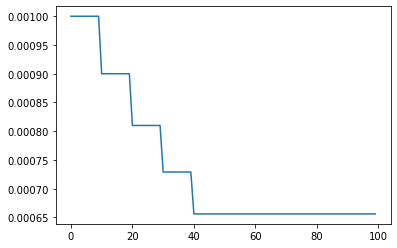

In [13]:
import matplotlib.pyplot as plt
plt.plot(agent.lr_list)